# Inputs 

## Input parameters

In [165]:
struct parameters
    nc # number of droplet classes
    case_no # a variable to switch between different breakage and coalescence cases 
    dConversion # conversion factor from micrometer to meter for droplet/particle size 
    rhoC # the density of the continous phase in kg/m^3
    rhoD # the density of the dispersed phase in kg/m^3
    rhoTSS # density of TSS in kg/m^3
    rho_chem # density of chemicals in kg/m^3
    rho_CH4 # density of methane gas in kg/m^3
    rho_PW # density of produced water in Kg/m^3  
    fConversion # to convert flowrate to cubic meter per second
    sigma # the interfacial tension (N.m^-1)
    MuD # viscosity of the dispersed phase (kg.(m-s)^-1)  
    MuW # water dynamic viscosity (kg.(m-s)^-1) 
    MuPW # viscosity of produced water at 50 degree (cp)  
    Wh # working hours of the system per year (hr)
    gravity # gravitational acceleration (m.s^-2)  
    oil_skimmer # oil skimmer cost ($)
    deltat # time step in second
    Cen # Energy price ($kwh^-1)
    rho_sludge # density of sludge in kg/m^3
    OnG_limit # final OnG requirements in mg/l 
    TSS_limit # final TSS requirements in mg/l

end 

rho_chem=[1390, 1467, 1330, 1233, 1048, 2130]
fConversion=1000/(3600*1014)
 

param=parameters(10, 4, 0.000001, 988, 900, 1270, rho_chem, 162.7, 1014 ,fConversion, 0.04, 0.0138,  0.00054 , 0.0005 , 8760, 9.81, 459, 1, 0.189, 1020, 42.0, 10.0)



parameters(10, 4, 1.0e-6, 988, 900, 1270, [1390, 1467, 1330, 1233, 1048, 2130], 162.7, 1014, 0.00027394258163488934, 0.04, 0.0138, 0.00054, 0.0005, 8760, 9.81, 459, 1, 0.189, 1020, 42.0, 10.0)

## Unit's data

In [166]:

using DataFrames
struct units

#chemicals fraction of influent flowrate for (in mg/l)
    rc_API  
    rc_CPI 
    rc_HC  
    rc_IGF 
    rc_NF
    rc_CF
    rc_MF


 # specific energy consumtion for (kWh.ton-1)
    renergy_API 
    renergy_CPI 
    renergy_HC
    renergy_IGF
    renergy_NF
    renergy_CF
    renergy_MF

# dry solid %
    drySolids_API 
    drySolids_CPI 
    drySolids_HC
    drySolids_IGF
    drySolids_NF
    drySolids_CF
    drySolids_MF

#cut diameter of contaminants in micron  
    APICutDia_TSS 
        
    CPICutDia_TSS 
     
    IGFCutDia_OnG 
    IGFCutDia_TSS 
    
    NFCutDia_OnG 
    NFCutDia_TSS 
    
    CFCutDia_OnG 
    CFCutDia_TSS 
    
    MFCutDia_OnG 
    MFCutDia_TSS 
    
# maximum allowable concentration of contaminants in (mg/l) for: 
    Cup_OnG_API 
    Cup_TSS_API 
    
    Cup_OnG_CPI 
    Cup_TSS_CPI 
    
    Cup_OnG_HC 
    Cup_TSS_HC 
    
    Cup_OnG_IGF 
    Cup_TSS_IGF 
    
    Cup_OnG_NF 
    Cup_TSS_NF 
    
    Cup_OnG_CF 
    Cup_TSS_CF 
     
    Cup_OnG_MF 
    Cup_TSS_MF 
    

end 

# chemical fraction mg/l
    rc_API=[0,0,0,0,0,0,0]
    rc_CPI=[0,0,0,0,0,0,0]
    rc_HC=[45,0,0,0,0,0,0]
    rc_IGF=[60,0,0,0,0,0,0]
    rc_NF=[0,5,0,0,0,0,0]
    rc_CF=[30,0,0,0,0,0,0]
    rc_MF=[0,15,0,0,0,2.2,4]

# dry solids for technology tech 
DrySolids  = DataFrames.DataFrame(
    [
        "API" 1
        "CPI" 2
        "HC" 5
        "IGF" 7
        "NF" 8
        "CF" 10
        "MF" 4.6  
                 
    ],
    ["tech","value"],
    ) 



# Specific energy consumtion (kWh.ton-1)
   renergy  = DataFrames.DataFrame(
    [
        "API" 0.19  
        "CPI" 0.19
        "HC"  3.0 
        "IGF" 4.83
        "NF"  0.27
        "CF"  4.0
        "MF"  0.4
                 
    ],
    ["tech","value"],
)  

# the cut diameter of technology tec for each cont in micron 
CutDia = DataFrames.DataFrame(
    [
        "API" 100   100 
        "CPI" 30    30  
        "IGF" 15    15  
        "NF"  5     5    
        "CF"  10    10   
        "MF"  1     1   
        
    ],
    ["tech","OnG", "TSS"],
    )    
    
    

# maximum allowable concentration of contaminants mg/l
Cup = DataFrames.DataFrame(
    [
        "API" 5000   5000  
        "CPI" 5000   5000   
        "HC"  4000   4000   
        "IGF" 1000   1000  
        "NF"  50     50
        "CF"  500    500   
        "MF"  100    100   

    ],  
    ["tech","OnG", "TSS"],
    )       

Data=units(rc_API, rc_CPI, rc_HC, rc_IGF, rc_NF, rc_CF, rc_MF,
            renergy[1,:"value"],renergy[2,:"value"],renergy[3,:"value"],renergy[4,:"value"], renergy[5,:"value"],renergy[6,:"value"],renergy[7,:"value"],
            DrySolids[1,:"value"],DrySolids[2,:"value"],DrySolids[3,:"value"],DrySolids[4,:"value"], DrySolids[5,:"value"],DrySolids[6,:"value"],DrySolids[7,:"value"],
            CutDia[1,:"TSS"], 
            CutDia[2,:"TSS"],  
            CutDia[3,:"OnG"], CutDia[3,:"TSS"],
            CutDia[4,:"OnG"], CutDia[4,:"TSS"],
            CutDia[5,:"OnG"], CutDia[5,:"TSS"],
            CutDia[6,:"OnG"], CutDia[6,:"TSS"],
            Cup[1,:"OnG"], Cup[1,:"TSS"], 
            Cup[2,:"OnG"], Cup[2,:"TSS"], 
            Cup[3,:"OnG"], Cup[3,:"TSS"], 
            Cup[4,:"OnG"], Cup[4,:"TSS"], 
            Cup[5,:"OnG"], Cup[5,:"TSS"], 
            Cup[6,:"OnG"], Cup[6,:"TSS"], 
            Cup[7,:"OnG"], Cup[7,:"TSS"]) 

units([0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [45, 0, 0, 0, 0, 0, 0], [60, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 0, 0], [30, 0, 0, 0, 0, 0, 0], [0.0, 15.0, 0.0, 0.0, 0.0, 2.2, 4.0], 0.19, 0.19, 3.0, 4.83, 0.27, 4.0, 0.4, 1, 2, 5, 7, 8, 10, 4.6, 100, 30, 15, 15, 5, 5, 10, 10, 1, 1, 5000, 5000, 5000, 5000, 4000, 4000, 1000, 1000, 50, 50, 500, 500, 100, 100)

## Initial conditions

In [167]:
struct data
    Cin_OnG # initial concentration of OnG in mg/l   
    Cin_TSS # initial concentration of TSS in mg/l 
    qfeed #flowrate in ton/hr # should not be here
    
end 

 inConditions=data(560, 500, 100) 



data(560, 500, 100)

## Calling Packages 

In [168]:
#using Pkg
#Pkg.rm("Fresa")
#Pkg.update()
#Pkg.add(url="https://github.com/ericsfraga/Fresa.jl#development")
#Pkg.add(["Random", "Distributions", "Plots", "DifferentialEquations"])
#Pkg.add("TypedTables")
#Pkg.add("DataFrames")
#Pkg.add("CSV")
#Pkg.add("StatsBase")
#Pkg.add("Trapz")
#Pkg.add("SpecialFunctions")
#Pkg.add("Optim")
using Fresa
using DifferentialEquations
using Random
using Distributions
using Plots
using StatsBase
using Trapz
using TypedTables 



# Particle Size Distribution 

## Initial Particle/droplets size distribution

In [169]:
function inPSD()
    
    #the log of min. oil droplet volume of class (i)    
    LogVmin = DataFrames.DataFrame(
        [
            "Ong" 10.6
            "TSS" 10.6
        ],
        ["cont","value"],
    )
    

    #the log of max. oil droplet volume of class (i)    
    LogVmax = DataFrames.DataFrame(
        [
            "Ong" 16
            "TSS" 16
            
            
        ],
        ["cont","value"],
    )
    
 
    # the volume step for contaminants 
    deltaV_OnG=(LogVmax[1, :"value"]-LogVmin[1, :"value"])/((param.nc)-1)
    deltaV_TSS=(LogVmax[2, :"value"]-LogVmin[2, :"value"])/((param.nc)-1)
    

    
    Logv_OnG=zeros(param.nc)
    v_OnG=zeros(param.nc) 
    
        
    for i in 1:param.nc
            #the log of oil droplet volume of class (i)
            Logv_OnG[i]=LogVmin[1, :"value"]+(i-1)*deltaV_OnG
            #the volume of oil droplets of class (i) in nano^3
            v_OnG[i]=(10^Logv_OnG[i])  
    end 
     
    
    Logv_TSS=zeros(param.nc)
    v_TSS=zeros(param.nc)
    
        
    for i in 1:param.nc
            #the log of TSS particle volume of class (i)
            Logv_TSS[i]=LogVmin[2, :"value"]+(i-1)*deltaV_TSS
            #the volume of TSS particle of class (i) in nano^3
            v_TSS[i]=(10^Logv_TSS[i])         
    end 
           
    
    vx_OnG=zeros(param.nc) 
    d_OnG=zeros(param.nc)
        
    for i in 1:param.nc
            #the volume of oil droplets of class (i) in m^3
            vx_OnG[i]=v_OnG[i]*10^(-27)
            #the diameter of oil droplets at class i in micron
            d_OnG[i]=((6*vx_OnG[i]/(π))^(1/3))*10^6
    end 

     
    
    vx_TSS=zeros(param.nc)    
    d_TSS=zeros(param.nc)
        
    for i in 1:param.nc
            #the volume of TSS particle of class (i) in m^3
            vx_TSS[i]=v_TSS[i]*10^(-27)
            #the diameter of TSS particle at class i in micron
          @show  d_TSS[i]=((6*vx_TSS[i]/(π))^(1/3))*10^6
    end 
         
     
        return v_OnG, v_TSS, vx_OnG, d_OnG, vx_TSS, d_TSS
                     
    end

       
    v_OnG, v_TSS, vx_OnG, d_OnG, vx_TSS, d_TSS = inPSD()

([3.981071705534969e10, 1.5848931924611108e11, 6.309573444801943e11, 2.511886431509582e12, 1.0e13, 3.9810717055349695e13, 1.584893192461111e14, 6.309573444801942e14, 2.511886431509582e15, 1.0e16], [3.981071705534969e10, 1.5848931924611108e11, 6.309573444801943e11, 2.511886431509582e12, 1.0e13, 3.9810717055349695e13, 1.584893192461111e14, 6.309573444801942e14, 2.511886431509582e15, 1.0e16], [3.9810717055349695e-17, 1.5848931924611109e-16, 6.309573444801944e-16, 2.511886431509582e-15, 1.0e-14, 3.98107170553497e-14, 1.584893192461111e-13, 6.309573444801942e-13, 2.511886431509582e-12, 1.0000000000000001e-11], [4.236434140165339, 6.714295629057894, 10.641441434665277, 16.865548087774616, 26.73009235143953, 42.364341401653384, 67.14295629057892, 106.41441434665275, 168.65548087774613, 267.30092351439527], [3.9810717055349695e-17, 1.5848931924611109e-16, 6.309573444801944e-16, 2.511886431509582e-15, 1.0e-14, 3.98107170553497e-14, 1.584893192461111e-13, 6.309573444801942e-13, 2.511886431509582

## Distribution Generator

In [170]:
function generate_PSD(mean, std, nc, d_OnG)
  
x_values = 1:nc
    # Generate random samples from a normal distribution
    PSD_data = pdf.(Normal(mean, std), x_values)

    # Ensure no negative values
     PSD_data .= abs.(PSD_data)
   
    # Normalize the data to ensure the sum is one
    PSD_norm = PSD_data ./ sum(PSD_data)

    
    # Plot the histogram
    plot_data = bar(x_values, PSD_norm, alpha=0.7, color=:green, xlabel="Value", ylabel="Probability",
                    title="Normalized Distribution with Mean $mean and Std $std")

    
      
    # Show the plot
    display(plot_data)

    return PSD_data, PSD_norm
end 


#PSD_data_OnG, PSDin_OnGx=generate_PSD(3, 3, param.nc, d_OnG)
#PSD_data_TSS, PSDin_TSSx=generate_PSD(11, 5 , param.nc, d_TSS)


#println(sum(PSD_data_OnG))
#println(sum(PSD_data_TSS))


#println(sum(PSDin_OnGx))
#println(length(PSDin_OnGx))
#t1 = Table(d_OnG = d_OnG, PSD_data = PSDin_OnGx)
#t2 = Table(d_TSS = d_TSS, PSD_data = PSDin_TSSx)
    




generate_PSD (generic function with 1 method)

## Original Distribution

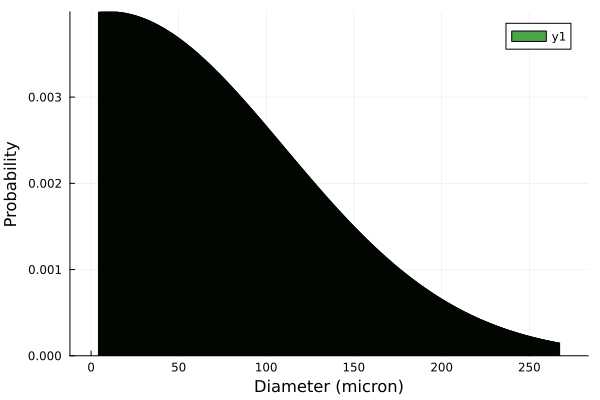

In [171]:
mean_value = 10
std_deviation = 100

function logDist(mean_value, std_deviation, diameter)

    # Specify the step size
    step_size = 0.1  
    
    # Specify the particle size range 
    d_range = range(d_OnG[1], d_OnG[param.nc], step=step_size)

    # Generate random samples from a normal distribution
    PSD_data = pdf.(Normal(mean_value, std_deviation), (d_range))

    # Find the index of the value closest to 10 in d_range
    idx = argmin(abs.(d_range .- diameter))

    # find probability of a given diameter 
    pdf_value = pdf(Normal(mean_value, std_deviation), diameter)

    # Get the corresponding PSD_data value
    PSD_at_d = PSD_data[idx]
    
    # Calculate the area under the curve using numerical integration (trapz)
    original_area = trapz(d_range, PSD_data) 

    # Return the probability of the target value
    return  d_range, PSD_data, original_area, PSD_at_d
end


d_range, PSD_data, original_area, PSD_at_d = logDist(mean_value, std_deviation, 108.245005450064)

# Plot the histogram
plot_data = bar(d_range, PSD_data, alpha=0.7, color=:green, xlabel="Diameter (micron)", ylabel="Probability")
display(plot_data)




## Predict the PDF

In [172]:
function prediction(value_to_predict, mean_value, std_deviation)

    PSD_at_d = zeros(param.nc)

    for i in 1:param.nc
        d_range, PSD_data, curve_area, PSD_at_d[i]  = logDist(mean_value, std_deviation, value_to_predict[i])
    end 
        return PSD_at_d
end  

prediction (generic function with 1 method)

## Area Under the Curve

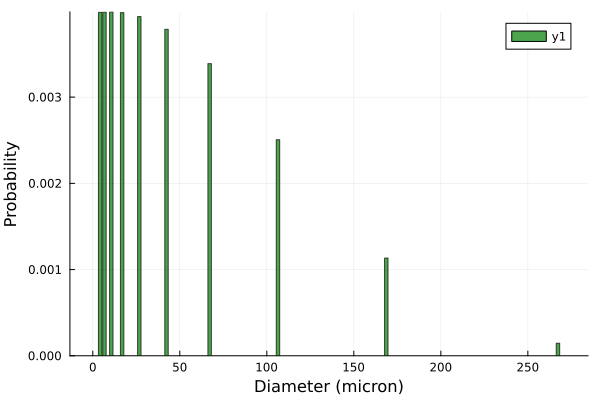

([0.003982802133532956, 0.00398729883000689, 0.003989342009363343, 0.003980111039192364, 0.0039339387419445645, 0.0037862054277133157, 0.003388603719786292, 0.00250589828811509, 0.0011335685300680905, 0.0001458928847450923], 0.5307244848602548, -2.47026299988063)

In [173]:
function area(mean_value, std_deviation, d_OnG)
   
   # call predication function to find PDF values of d_OnG diameter 
   PSD_at_d = prediction(d_OnG, mean_value, std_deviation)
     
   # Calculate the area under the curve using numerical integration (trapz)
   area_case_study = trapz(d_OnG, PSD_at_d)

   # find the difference in area between the original and case study 
   delta_area = 100*((original_area-area_case_study)/original_area)
      
   # Plot the histogram
   plot_data = bar(d_OnG, PSD_at_d, alpha=0.7, color=:green, xlabel="Diameter (micron)", ylabel="Probability")
   display(plot_data)
     
   return PSD_at_d, area_case_study, delta_area
end 

PSD_at_d, area_case_study, delta_area = area(mean_value, std_deviation, d_OnG)

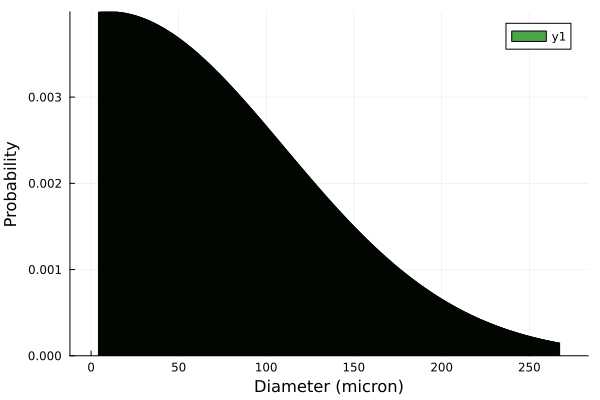

In [174]:
total_area = sum(PSD_at_d)

PSDin_OnGx = zeros(param.nc)
PSDin_TSSx = zeros(param.nc)


for i in 1:param.nc
    PSDin_OnGx[i] = PSD_at_d[i]/total_area
    PSDin_TSSx[i] = PSD_at_d[i]/total_area
end 


# Plot the histogram
plot_PSD = bar(d_OnG, PSDin_OnGx, alpha=0.7, color=:green, xlabel="Value", ylabel="Probability")
display(plot_data)

## Units PSD

In [175]:
function PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS)
   
    # total volume of contamenant in m^3
    Vtot_OnG_in=Cin_OnG*1000/(param.rhoD*10^6)
    Vtot_TSS_in=Cin_TSS*1000/(param.rhoTSS*10^6)
    
        
    # fraction of contamenant in water 
    Alpha_OnG = Vtot_OnG_in
    Alpha_TSS = Vtot_TSS_in

    # volume per class for each contaminant in m^3
    Vpar_OnG_in=zeros(param.nc)
    Vpar_TSS_in=zeros(param.nc)
    
        
    Vpar_OnG_in=Vtot_OnG_in .*PSDin_OnG
    Vpar_TSS_in=Vtot_TSS_in .*PSDin_TSS
    
        
    # number per class for each contaminant in m^3
    n_OnG=zeros(param.nc)
    n_TSS=zeros(param.nc)
    
    
    n_OnG=Vpar_OnG_in ./vx_OnG
    n_TSS=Vpar_TSS_in ./vx_OnG
    
     #100*(sum(Vpar_OnG_in)-Vtot_OnG_in)/Vtot_OnG_in
     #100*(sum(Vpar_TSS_in)-Vtot_TSS_in)/Vtot_TSS_in

    
    return Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_in,
           Vpar_TSS_in, n_OnG, n_TSS
                     
    end

   
    
    #Alpha_OnG, Vtot_OnG_in,Vtot_TSS_in,
    #Vpar_OnG_in, Vpar_TSS_in, n_OnG, n_TSS = PSD(PSDin_OnGx, PSDin_TSSx, inConditions.Cin_OnG, inConditions.Cin_TSS, v_OnG, v_TSS)
     
                                      

PSD (generic function with 1 method)

# Population Balance Equations 

## Reynolds Number

In [176]:
function Reynolds(qfeed, Area, diameter)

    velocity = qfeed*param.fConversion/Area

    Re = param.rhoC*velocity*diameter/param.MuW

    return velocity, Re
end 

#velocity, Re = Reynolds(250, 9.6, 1)

Reynolds (generic function with 1 method)

## Energy Dissipation Rate 

In [177]:
function edr(renergy, volume, qfeed)

    # power per unit (kW)
    Power = renergy*qfeed

    # energy dissipation rate (m^2/s^3) 
    epsilon = Power/(param.rhoC*volume)
    

    return epsilon
end 

edr (generic function with 1 method)

## 4.0 Kernels

In [178]:
function Omega_flow_0()
   
    OmegaB_OnG = zeros(param.nc)
    OmegaC_OnG = zeros(param.nc, param.nc)
    OmegaB_TSS = zeros(param.nc)
    OmegaA_TSS = zeros(param.nc, param.nc) 

    return OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS
end 

Omega_flow_0 (generic function with 1 method)

## 4.1 Kernels 

In [179]:
function Omega_flow_1(Reynolds, d_OnG, d_TSS, epsilon, Alpha_OnG)

    if Reynolds <= 2000
        OmegaB_OnG = zeros(param.nc)
        OmegaC_OnG= coalescenceL(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_L(epsilon, d_TSS)
    else 
        OmegaB_OnG= breakage_t(epsilon, d_OnG, Alpha_OnG) 
        OmegaC_OnG= coalescenceT(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_T(epsilon, d_TSS)
    end 

    return OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS
end 

Omega_flow_1 (generic function with 1 method)

## 4.2 Kernels

In [180]:
function Omega_flow_2(Reynolds, d_OnG, epsilon)

    if Reynolds <= 2000
        OmegaB_OnG = zeros(param.nc)
        OmegaC_OnG= coalescenceL(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_L(epsilon, d_TSS)
    else 
        OmegaB_OnG= Breakage_DT_2(epsilon, d_OnG)
        OmegaC_OnG= coalescenceT(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_T(epsilon, d_TSS)
    end 

    return OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS
end 

#OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS = Omega_flow_2(9000, d_OnG, 0.12)


Omega_flow_2 (generic function with 1 method)

## 4.3 Kernels

In [181]:
function Omega_flow_3(Reynolds, d_OnG, vx_TSS, epsilon, Alpha_OnG)

    if Reynolds <= 2000
        OmegaB_OnG = zeros(param.nc)
        OmegaC_OnG= coalescenceL(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T_3(vx_TSS, epsilon)
        OmegaA_TSS= particle_agg_L(epsilon, d_TSS)
    else 
        OmegaB_OnG= breakage_t(epsilon, d_OnG, Alpha_OnG) 
        OmegaC_OnG= coalescenceT(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T_3(vx_TSS, epsilon)
        OmegaA_TSS= particle_agg_T(epsilon, d_TSS)
    end 

    return OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS
end 

Omega_flow_3 (generic function with 1 method)

## 4.4 Kernels

In [182]:
function Omega_flow_4(Reynolds, d_OnG, epsilon, Alpha_OnG)

    if Reynolds <= 2000
        OmegaB_OnG = zeros(param.nc)
        OmegaC_OnG= Coalescence_DL_4(epsilon, d_OnG)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_L(epsilon, d_TSS)
    else 
        OmegaB_OnG= breakage_t(epsilon, d_OnG, Alpha_OnG) 
        OmegaC_OnG= coalescenceT(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_T(epsilon, d_TSS)
    end 

    return OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS
end 

Omega_flow_4 (generic function with 1 method)

## 4.5 Kernels

In [183]:
function Omega_flow_5(Reynolds, d_OnG, epsilon, Alpha_OnG)

    if Reynolds <= 2000
        OmegaB_OnG = zeros(param.nc)
        OmegaC_OnG= coalescenceL(d_OnG, epsilon)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_L(epsilon, d_TSS)
    else 
        OmegaB_OnG= breakage_t(epsilon, d_OnG, Alpha_OnG) 
        OmegaC_OnG= Coalescence_DT_5(epsilon, d_OnG)
        OmegaB_TSS= Particle_Breakage_T(d_TSS, epsilon)
        OmegaA_TSS= particle_agg_T(epsilon, d_TSS)
    end 

    return OmegaB_OnG, OmegaC_OnG, OmegaB_TSS, OmegaA_TSS
end 

Omega_flow_5 (generic function with 1 method)

## Euler method 

In [184]:
function PBE(vx_OnG, OmegaB_OnG, n_OnG, OmegaC, Vpar_OnG_in)

       
    #_________________________________________Death Due to Breakage_______________________________________________________    
    #The number of oil droplets of class k disapeared due to breakage 
    Db=zeros(param.nc)  
        for k in 2:param.nc
            # It is assumped the smallest droplet (i=1) won't break so start from 2
           Db[k]=OmegaB_OnG[k]*n_OnG[k]      
        end
    
    Db_volume=zeros(param.nc)
    
        for k in 2:param.nc    
           Db_volume[k]=Db[k]*vx_OnG[k]
        end 
    
     total_Db_volume=sum(Db_volume)
    
    #_________________________________________Birth Due to Breakage_______________________________________________________    
        
    Gamma=zeros(param.nc,param.nc)
        
        for i in 2:param.nc
            for k in 1:i-1
              Gamma[i,k]=1/(i-1) 
            end
        end 
    
    
        
    #The number of oil droplets of class k generated due to breakage of class i 
    Bbx=zeros(param.nc,param.nc) 
    Bb=zeros(param.nc)   
    
        for i in 2:param.nc
            for k in 1:i-1
              Bbx[i,k]=OmegaB_OnG[i]*Gamma[i,k]*n_OnG[i]*vx_OnG[i]/vx_OnG[k]    
            end
        end 
    
    
        
        
        
        for k in 1:param.nc-1           
           Bb[k]=sum(Bbx[i,k]    for i=2:param.nc)  
        end 
    
    
    
    
    Bb_volume=zeros(param.nc)
        for k in 1:param.nc    
           Bb_volume[k]=Bb[k]*vx_OnG[k]
        end 
    
    # Bb_volume
    
        
     total_Bb_volume=sum(Bb_volume)
        
    #_________________________________________Death Due to Coalescence_______________________________________________________
    
    #The number of oil droplets of class k disapeared due to coalescence between droplets of class i and k  
    Dc1=zeros(param.nc)
    Dc2=zeros(param.nc)
    Dc3x=zeros(param.nc)
    Dc3=zeros(param.nc)
    Dc=zeros(param.nc)
    
        
    for k in 2:param.nc-1
            for i in 1:k-1
                             
                  
                    Dc1[k]+=OmegaC[i,k]*n_OnG[i]
                
            end 
                    Dc1[k]=n_OnG[k]*Dc1[k]
    end
    
    
        
    for i in 1:param.nc-2  
        for k in i+1:param.nc-1
                    Dc2[i]+=OmegaC[i,k]*n_OnG[k]
                
            end 
               Dc2[i]=n_OnG[i]*Dc2[i]
    end
    
        
    
        
        
    for k in 1:param.nc-1
        for i in 1:param.nc-1
            if i==k
                Dc3x[k]+=2*OmegaC[i,k]*n_OnG[i] *n_OnG[k]                 
            end
        end 
        Dc3[k]=Dc3x[k]
    end 
         
    
    Dc=Dc1+Dc2+Dc3    
    
    Dc_volume=zeros(param.nc)
    
    for k in 1:param.nc    
       Dc_volume[k]=Dc[k]*vx_OnG[k]
    end 
        
    Dc_total_volume=sum(Dc_volume)
        
    #_________________________________________Birth Due to Coalescence_____________________________________________________
        
    #volume of oil droplets resulted from coalescence between i and k in nano^3  
        Vl=zeros(param.nc,param.nc)  
        for i in 1:param.nc-1 
            for k in i:param.nc-1                            
                Vl[i,k]=(vx_OnG[i]+vx_OnG[k])           
            end
        end    
        
    #The number of oil droplets of class k generated due to coalescence between droplets of class i and k 
     Bcx=zeros(param.nc,param.nc)
     Bcx_vol=zeros(param.nc,param.nc)
        for i in 1:param.nc-1 
            for k in i:param.nc-1                            
                    Bcx[i,k]=OmegaC[i,k]*n_OnG[k] *n_OnG[i]
                    Bcx_vol[i,k]=Bcx[i,k]*(Vl[i,k])
            end
        end 
    
    Bcx_total_volume=sum(Bcx_vol)  
    
        
    #Volume and number approximation     
    Bc=zeros(param.nc)
    z=zeros(param.nc)
    Ng=zeros(param.nc,param.nc)
    
    
        for i in 1:param.nc
            for k in 1:param.nc           
                for ii in 1:param.nc-1
                    if vx_OnG[ii]< Vl[i,k] < vx_OnG[ii+1] 
                        # Ng is the number of droplets the end up in the smaller class
                        Ng[i,k]=Bcx[i,k]*(Vl[i,k] .-vx_OnG[ii+1]) ./(vx_OnG[ii] .-vx_OnG[ii+1])
                        # Add that number to the smallest class 
                        z[ii]= z[ii]+Ng[i,k]
                        # Add everything else to the other class 
                        z[ii+1]=z[ii+1]+Bcx[i,k]-Ng[i,k]            
                    end 
                      Bc[ii]=Bc[ii]+z[ii]                                                               
                end 
            end 
        end 
       
     
    for i in 1:param.nc  
         (z[i]-Dc[i])*vx_OnG[i]
    end
    
    zvolume=zeros(param.nc)    
    
    for i in 1:param.nc
           zvolume[i]=z[i]*vx_OnG[i]
            (z[i]-Dc[i])*vx_OnG[i]
        end
    
    totalZvolume=sum(zvolume)
        
    #_________________________________________Rate of Change in Volume_________________________________________________
    
    dndt=zeros(param.nc) 
    partial_balance=zeros(param.nc)
       
        for i in 1:param.nc
          dndt[i]=(z[i]-Dc[i]+Bb[i]-Db[i])
          partial_balance[i]=dndt[i].*vx_OnG[i]+Vpar_OnG_in[i]
    100*(Vpar_OnG_in[i]-partial_balance[i])/Vpar_OnG_in[i]
        end
    sum(100*(Vpar_OnG_in-partial_balance)/Vpar_OnG_in)
    
    
       
    return dndt
    end
    
    #dndt=PBE(vx_OnG,OmegaB_OnG,n_OnG,OmegaC,Vpar_OnG_in)
    

PBE (generic function with 1 method)

## Differential Equations 

In [185]:
function dfPBE(n_OnG, parameters, tspan)
         
    
    vx_OnG = parameters[1]
    OmegaB_OnG = parameters[2]
    OmegaC = parameters[3]

    #_________________________________________Death Due to Breakage_______________________________________________________    
        #The number of oil droplets of class k disapeared due to breakage 
        Db=zeros(param.nc)  
            # It is assumped the smallest droplet (i=1) won't break so start from 2
            for k in 2:param.nc                                
                Db[k]=OmegaB_OnG[k]*n_OnG[k]     
            end

           
            
            Db_volume=zeros(param.nc)
            for k in 2:param.nc    
                Db_volume[k]=Db[k]*vx_OnG[k]
            end 
            
            total_Db_volume=sum(Db_volume)
            
    #_________________________________________Birth Due to Breakage_______________________________________________________    
                
        Gamma=zeros(param.nc,param.nc)
                
        for i in 2:param.nc
            for k in 1:i-1
                Gamma[i,k]=1/(i-1) 
            end
        end 
        
        
                
        #The number of oil droplets of class k generated due to breakage of class i 
        Bbx=zeros(param.nc,param.nc)           
            
        for i in 2:param.nc
            for k in 1:i-1                
                Bbx[i,k]=OmegaB_OnG[i]*Gamma[i,k]*n_OnG[i]*vx_OnG[i]/vx_OnG[k]                   
            end
        end            
            
        Bb=zeros(param.nc)                               
        for k in 1:param.nc-1           
            Bb[k]=sum(Bbx[i,k]    for i=2:param.nc)  
        end 
             
        Bb_volume=zeros(param.nc)
        for k in 1:param.nc    
            Bb_volume[k]=Bb[k]*vx_OnG[k]
        end     
                
        total_Bb_volume=sum(Bb_volume)

     #if  total_Db_volume != total_Bb_volume
         #difference_breakage = total_Db_volume - total_Bb_volume
         #println("There is a mismatch in the breakage of $difference_breakage")  
     #end                 
    #__ _______________________________________Death Due to Coalescence_______________________________________________________
            
    #The number of oil droplets of class k disapeared due to coalescence between droplets of class i and k  
    Dc1=zeros(param.nc)
    Dc2=zeros(param.nc)
    Dc3x=zeros(param.nc)
    Dc3=zeros(param.nc)
    Dc=zeros(param.nc)
            
                
    for k in 2:param.nc-1
        for i in 1:k-1                                                     
            Dc1[k]+=OmegaC[i,k]*n_OnG[i]                    
        end 
        Dc1[k]=n_OnG[k]*Dc1[k] 
    end

    
     
            
                
    for i in 1:param.nc-2  
        for k in i+1:param.nc-1
             Dc2[i]+=OmegaC[i,k]*n_OnG[k]                
        end 
        Dc2[i]=n_OnG[i]*Dc2[i]
    end
    
    
                
    for k in 1:param.nc-1       
        Dc3x[k]=2*OmegaC[k,k]*n_OnG[k]*n_OnG[k]          
    end
                
            
    Dc=Dc1+Dc2+Dc3x    
            
    Dc_volume=zeros(param.nc)
            
    for k in 1:param.nc    
        Dc_volume[k]=Dc[k]*vx_OnG[k]
    end 

    
                
    Dc_total_volume=sum(Dc_volume)
    Dc_total_volume/0.0020555555555555557
                
    #_________________________________________Birth Due to Coalescence_____________________________________________________
                
        #volume of oil droplets resulted from coalescence between i and k in nano^3  
        Vl=zeros(param.nc,param.nc)  
            for i in 1:param.nc-1 
                for k in i:param.nc-1                            
                    Vl[i,k]=(vx_OnG[i]+vx_OnG[k])           
                end
            end    
                
        #The number of oil droplets of class k generated due to coalescence between droplets of class i and k 
        Bcx=zeros(param.nc,param.nc)
        Bcx_vol=zeros(param.nc,param.nc)
            for i in 1:param.nc-1 
                for k in i:param.nc-1                            
                    Bcx[i,k]=OmegaC[i,k]*n_OnG[k]*n_OnG[i]
                    Bcx_vol[i,k]=Bcx[i,k]*(Vl[i,k])
                end
            end         
            
                   
                          
        #Volume and number approximation     
        Bc=zeros(param.nc)
        z=zeros(param.nc)
        ab=zeros(param.nc)
        Ng=zeros(param.nc,param.nc)                        
        for i in 1:param.nc
            for k in 1:param.nc           
                for ii in 1:param.nc-1                    
                   if vx_OnG[ii]< Vl[i,k] < vx_OnG[ii+1]
                       # Ng is the number of droplets the end up in the smaller class
                        Ng[i,k]=Bcx[i,k]*(Vl[i,k] .-vx_OnG[ii+1]) ./(vx_OnG[ii] .-vx_OnG[ii+1])
                        # Add that number to the smallest class 
                         Bc[ii]= Bc[ii]+Ng[i,k]
                        # Add everything else to the other class 
                         Bc[ii+1]=Bc[ii+1]+Bcx[i,k]-Ng[i,k]  
                    else
                        #println("no values for z") 
                        #z[ii]=0
                        #z[ii+1]=0
                        ab[ii]=0                                                   
                    end 
                    #Bc[ii]=Bc[ii]+z[ii]
                    #Bc[ii+1]=Bc[ii+1]+z[ii+1]                                                                   
                end 
            end 
        end 
                  
    volume_Bc=zeros(param.nc)
    #total=zeros(param.nc) 
    for i in 1:param.nc
        volume_Bc[i]=Bc[i]*vx_OnG[i]
        #total[i]=z[i]-Dc[i]+Bb[i]-Db[i]
    end
    
    total_volume_Bc = sum(volume_Bc)
    
    #if  total_volume_Bc != Dc_total_volume
    #    difference_coalescence = total_volume_Bc - Dc_total_volume
    #    println("There is a mismatch in the coalescence of $difference_coalescence") 
    #    println("For the birth it is $total_volume_Bc") 
    #    println("For the death it is $Dc_total_volume")  
    # end  
    
     
    
    return Bc-Dc+Bb-Db
    
end


#n_OnG=dfPBE(n_OnG,[vx_OnG,zeros(param.nc),OmegaC],10)

dfPBE (generic function with 1 method)

## Solving PBE

In [186]:
function method(n, rt, OmegaB, OmegaC, Vpar_in, vx)
    
    # number of time steps to perform where tf has been given as the final
    # time to simulate
    nt=round(rt/param.deltat)
    
    withodeproblem = true
        if withodeproblem == true
            x0=n
            tspan=(0.0, rt)
            parameters=[vx, OmegaB, OmegaC]
            prob = ODEProblem(dfPBE, x0, tspan, parameters)
            results = DifferentialEquations.solve(prob)
            n = results[end]
        
            
        else # use Euler's method directly
            for t in 1:nt                   # for nt time steps
        
                # evaluate right hand side of ODE system, PBE(), which returns a
                # vector corresponding to dn/dt for each class
        
                dndt=PBE(vx, OmegaB, n, OmegaC, Vpar_in)
                # (dndt/n_OnG)*100
                # now step forward in time, with a time step deltat, updating the
                # dependent variable, n_OnG
    
                n = n + param.deltat * dndt   
            end   
        end

        Vpar_int=zeros(param.nc)
                  
        # calculate the voulem of each class given the new number of droplets at each class
            for i in 1:param.nc
                Vpar_int[i]=n[i]*vx[i]
            end

        vtot_int=sum(Vpar_int)

        PSD_int=zeros(param.nc)
                  
        # calculate the voulem of each class given the new number of droplets at each class
            for i in 1:param.nc
                if vtot_int <= 0 || Vpar_int[i] <= 0
                    PSD_int[i] = 0
                else     
                    PSD_int[i] = Vpar_int[i]/vtot_int
                end # end of the if condition 
            end # end of the for loop

        
        return n, Vpar_int, vtot_int, PSD_int
    end 

method (generic function with 1 method)

# Breakage

## 4.1 Droplets Laminar Breakage Model 

In [187]:
function breakage_DL_1(d_OnG)

    p0 = 1
    p1 = 1
    p2 = 2

    lambda = param.MuD/param.MuW

    ft = 10^(p0+p1*log10(lambda)+p2*(log10(lambda))^2)
    fp = (19*lambda+16) / (16*lambda+16)
    Tbr = zeros(param.nc)
    OmegaB_OnG = zeros(param.nc)

    for i in 2:param.nc
        Tbr[i] = param.MuW*(d_OnG[i]*param.dConversion)*fp/param.sigma
        OmegaB_OnG[i] = 1/Tbr[i]
    end 

    return OmegaB_OnG
end 

#OmegaB_OnG = breakage_DL_1(d_OnG)


breakage_DL_1 (generic function with 1 method)

## 4.1 Droplets Turbulent Breakage Model

In [188]:
function breakage_t(epsilon, d_OnG, Alpha_OnG)         

    C3=0.00481
    C4=0.08
    OmegaB_OnG=zeros(param.nc)

    for i in 2:param.nc
      OmegaB_OnG[i]=C3*(d_OnG[i]*param.dConversion)^(-2/3)*(epsilon^(1/3)/(1+Alpha_OnG))*
                    2.71^((-C4*param.sigma*(1+Alpha_OnG)^2) /(param.rhoC*epsilon^(2/3)*(d_OnG[i]*param.dConversion)^(5/3)))
    end 

       return OmegaB_OnG

    end

  # OmegaB_OnG=breakage_t(0.35, d_OnG, 0.1)

breakage_t (generic function with 1 method)

## 4.1 Particles Turbulent Breakage Model

In [189]:
function Particle_Breakage_T(d_TSS, epsilon)

    # a fitting parameter that represents the critical force needed for the breakage of aggregates
    B=5
    #kinematic viscosity m2·s−1 (the absolute viscosity of a liquid divided by its density at the same temperature)
    v = param.MuPW/param.rho_PW
    epsilon_cr=zeros(param.nc)
    OmegaB_TSS=zeros(param.nc)

      
     for i in 2:param.nc
        # the critical rate of energy dissipation that causes the breakage
        epsilon_cr[i]=B/((d_TSS[i])/2)
        #Exponential breakage model
        OmegaB_TSS[i]=(4/(15*pi))^0.5*(epsilon/v)^0.5*2.71^(-epsilon_cr[i]/epsilon)
    end 

    return OmegaB_TSS
end 

 #OmegaB_TSS=Particle_Breakage_T(d_TSS, 0.2657951984834285)

Particle_Breakage_T (generic function with 1 method)

## 4.2 Droplets Turbulent Breakage Model

In [190]:
function Breakage_DT_2(epsilon, d_OnG)

    Kg=8.2
    Beta=0.25

    Dc = 10^6 * 1.26* (param.sigma/(Beta*param.rhoC))^(3/5) * epsilon^(-2/5)
    
    OmegaB_OnG=zeros(param.nc)
    
    for i in 2:param.nc 
        if d_OnG[i] < Dc
            OmegaB_OnG[i] = 0
        else 
        OmegaB_OnG[i]=Kg*((Beta*(epsilon*d_OnG[i]*param.dConversion)^(2/3))-(12*param.sigma/(param.rhoC*d_OnG[i]*param.dConversion)))^0.5/d_OnG[i]
        end # end of the if condition     
    end # end of the for loop 

    return OmegaB_OnG
end 

# OmegaB_OnG = Breakage_DT_2(0.12, d_OnG)

Breakage_DT_2 (generic function with 1 method)

## 4.3 Particle Turbulent Breakage Model

In [191]:
function Particle_Breakage_T_3(v_TSS, epsilon)

    #kinematic viscosity m2·s−1 (the absolute viscosity of a liquid divided by its density at the same temperature)
    v = param.MuPW/param.rho_PW

    # the absolute velocity gradient (s^-1)
    G = (epsilon/v)^0.5 

    OmegaB_TSS=zeros(param.nc)

      
     for i in 2:param.nc
        #Exponential breakage model
        OmegaB_TSS[i] = 9*10^-7 * G^(0.71) * (vx_TSS[i]*10^6)^(0.33)
    end 

    return OmegaB_TSS
end 

#OmegaB_TSS=Particle_Breakage_T_3(vx_TSS, 0.002657951984834285)

Particle_Breakage_T_3 (generic function with 1 method)

# Coalescence

## 4.1 Droplets Laminar Coalescence Model

In [192]:
function coalescenceL(d_OnG, epsilon)

    #MULTIPHASE FLOW THEORY APPLIED TO WATER TREATMENT SYSTEMS AND DEVELOPMENT OF A NEW WALL FILM MODEL FOR MEMBRANE FOULING

    req=zeros(param.nc,param.nc)
    r=zeros(param.nc)
    tcontact1=zeros(param.nc,param.nc)
    tcontact2=zeros(param.nc,param.nc)
    tcontact3=zeros(param.nc,param.nc)
    tdrain=zeros(param.nc,param.nc)
    tcontact=zeros(param.nc,param.nc)
    Lambda=zeros(param.nc,param.nc)
    h=zeros(param.nc,param.nc)
    hi=zeros(param.nc,param.nc)
    hcr=zeros(param.nc,param.nc)
    eta=zeros(param.nc,param.nc)
    F=zeros(param.nc,param.nc)
    OmegaC=zeros(param.nc,param.nc)
    
    
        
    #kinematic viscosity m2·s−1 (the absolute viscosity of a liquid divided by its density at the same temperature)
    v = param.MuPW/param.rho_PW

    # the absolute velocity gradient (s^-1)
    G = (epsilon/v)^0.5 
    
    C1 = 0.5
    for i in 1:param.nc-1 
        for k in i:param.nc-1

            #r[i,k]=d_OnG[i]*d_OnG[k]*param.dConversion /(d_OnG[i]+d_OnG[k])
            r[i] = (d_OnG[i]*param.dConversion/2)
            r[k] = (d_OnG[k]*param.dConversion/2)
            
            # The collision frquency of droplets i and k
             h[i,k]=(4/3)*(r[i]+r[k])^3*G

            #the equivalent radius (m); 
             req[i,k]=0.5*(1/r[i]+1/r[k])^(-1)
            
            #The coalescence effeciency of droplets i and k
             Lambda[i,k]=2.71^(-2.3*param.rhoC^(0.5)*req[i,k]^(5/6)*epsilon^(1/3)/param.sigma^0.5)
            
            
            #The coalescence frquency of droplets i and k
            OmegaC[i,k]=Lambda[i,k]*h[i,k]                                
        end 
        
    end 
    
    
     
   return  OmegaC
    
end

#OmegaC=coalescenceL(d_OnG, 0.0013219987420223782)

coalescenceL (generic function with 1 method)

## 4.1 Particles Laminar Aggregation Model

In [193]:
function particle_agg_L(epsilon, d_TSS)

    # temperature (c)
    T=50 
    
    #  Boltzmann constant (J/K)
    k_B=1.38065*10^(-23)
    
    # fluid properties parameter
    k_f=0.87

    # Hamaker constant representing van der Walls force (J)
    #Hamaker=4*10^(-20)
    Hamaker=1.7*10^(-20)
    
    #kinematic viscosity m2·s−1 (the absolute viscosity of a liquid divided by its density at the same temperature)
    v=param.MuPW/param.rho_PW

    # the absolute velocity gradient (s^-1)
    G=(epsilon/v)^0.5 

    # variables initalisation 
    req=zeros(param.nc,param.nc)
    r_TSS=zeros(param.nc)
    Velocity=zeros(param.nc)
    h_BM=zeros(param.nc,param.nc)
    h_DS=zeros(param.nc,param.nc)
    h_SH=zeros(param.nc,param.nc)
    h_tot=zeros(param.nc,param.nc)
    e=zeros(param.nc,param.nc)
    lambda=zeros(param.nc,param.nc)
    OmegaA_TSS=zeros(param.nc,param.nc)

    for i in 1:param.nc-1
        for k in i:param.nc-1
            # radius of particle i and k in m 
            r_TSS[i]=d_TSS[i]/2
            r_TSS[k]=d_TSS[k]/2
            #the equivalent radius (m);
            req[i,k]=d_TSS[i]*d_TSS[k]*param.dConversion /(d_TSS[i]+d_TSS[k])
            # the settling velocity (m/s)
            Velocity[i]=347.5602*(d_TSS[i]*param.dConversion)^(1.54)
            Velocity[k]=347.5602*(d_TSS[k]*param.dConversion)^(1.54)
            # collision due to brownian motion
            h_BM[i,k]= 2*k_B*T*((d_TSS[i]*param.dConversion)+(d_TSS[k]*param.dConversion))^2/(2*param.MuW*(d_TSS[i]*param.dConversion)*(d_TSS[k]*param.dConversion))
            # collision due to differential sedimentation
            h_DS[i,k]=(pi/4)*((d_TSS[i]*param.dConversion)+(d_TSS[k]*param.dConversion))^2*abs(347.5602(d_TSS[i]*param.dConversion)^(1.54)-347.5602(d_TSS[k]*param.dConversion)^(1.54)) 
            # collision due to flow shear 
            h_SH[i,k]=(4/3)*G*(((d_TSS[i]*param.dConversion)+(d_TSS[k]*param.dConversion))^3/8)
            # total collision frequency
            h_tot[i,k]= h_BM[i,k]+h_DS[i,k]+h_SH[i,k]
            # parameter that represents the relation between van der Walls force and flow shear force
            e[i,k]=Hamaker/(36*pi*param.MuW*G*req[i,k])
            # aggregation effeciency
            lambda[i,k]=k_f*e[i,k]^(0.18)
            # aggregation rate
            OmegaA_TSS[i,k]=h_tot[i,k]*lambda[i,k] 
        end # end of the k for loop
    end # end of the i for loop 
    
        
    return(OmegaA_TSS)

end # end of the function 



#OmegaA_TSS= particle_agg_L(3.13219987420223782, d_TSS)

particle_agg_L (generic function with 1 method)

## 4.4 Droplets Laminar Coalesncnce 

In [194]:
function Coalescence_DL_4(epsilon, d_OnG)

    C12 = 10^9
    C13 = 7.5*10^3
    
    u = zeros(param.nc)
    r = zeros(param.nc)
    h = zeros(param.nc,param.nc)
    lambda_1 = zeros(param.nc,param.nc)
    lambda_2 = zeros(param.nc,param.nc)
    lambda = zeros(param.nc,param.nc)
    OmegaC_OnG = zeros(param.nc,param.nc)

    for i in 1:param.nc-1 
        for k in i:param.nc-1
        # droplet velocity (m/s)
        u[i] = (2.14*param.sigma/(param.rhoC*d_OnG[i]*param.dConversion)+0.505*param.gravity*d_OnG[i]*param.dConversion)^0.5
        u[k] = (2.14*param.sigma/(param.rhoC*d_OnG[k]*param.dConversion)+0.505*param.gravity*d_OnG[k]*param.dConversion)^0.5
        # droplet radius in m 
        r[i] = d_OnG[i]*param.dConversion/2
        r[k] = d_OnG[k]*param.dConversion/2
        # Collision frequency
        h[i,k] = (pi/4) * (d_OnG[i]*param.dConversion+d_OnG[k]*param.dConversion)^2 * abs(u[i]-u[k])
        # Coalescence efficiency
        lambda_1[i,k] = 2.71^(-C12*(param.MuW*param.rhoC*epsilon/param.sigma^2)*(r[i]*r[k]/(r[i]+r[k]))^4)
        lambda_2[i,k] = 2.71^(-C13*(param.sigma / (param.rhoD*epsilon^(2/3)))*((r[i]^2+r[k]^2)*(r[i]^3+r[k]^3)/((r[i]^3*r[k]^3)*(r[i]^(2/3)+r[k]^(2/3)))))
        lambda[i,k] = lambda_1[i,k] + lambda_2[i,k] + lambda_1[i,k]*lambda_2[i,k]
        # Coalescence frequency
        OmegaC_OnG[i,k] = h[i,k]*lambda[i,k]

        end 
    end 

    return OmegaC_OnG
end 

# OmegaC_OnG = Coalescence_DL_4(0.0002, d_OnG)

Coalescence_DL_4 (generic function with 1 method)

## 4.1 Droplets Coalescence in Turbulent Flow

In [195]:
function coalescenceT(d_OnG, epsilon)
    
   
    #constant for the coalescence model 
    c=0.28 
    
    req = zeros(param.nc,param.nc)
    r=zeros(param.nc)
    Lambda=zeros(param.nc,param.nc)
    h=zeros(param.nc,param.nc)
    OmegaC=zeros(param.nc,param.nc)
    
      
    for i in 1:param.nc-1 
        for k in i:param.nc-1
            # The collision frquency of droplets i and k
            h[i,k]=c*(d_OnG[i]*param.dConversion+d_OnG[k]*param.dConversion) .^2*((d_OnG[i]*param.dConversion) .^(2/3)+(d_OnG[i]*param.dConversion) .^(2/3))^0.5*epsilon^(1/3) 
            
            # the equivalent radius (m) 
            r[i] = (d_OnG[i]*param.dConversion/2)
            r[k] = (d_OnG[k]*param.dConversion/2)
            req[i,k]=0.5*(1/r[i]+1/r[k])^(-1)
            
            #The coalescence effeciency of droplets i and k
            Lambda[i,k]=2.71^(-2.3*param.rhoC^(0.5)*req[i,k]^(5/6)*epsilon^(1/3)/param.sigma^0.5)
           
            #The coalescence frquency of droplets i and k
            OmegaC[i,k]=Lambda[i,k]*h[i,k]
                                         
        end 
        
    end 

    
    
   return  OmegaC
    
end
    
 # OmegaC=coalescenceT(d_OnG, 0.33983668453164034)

coalescenceT (generic function with 1 method)

## 4.5 Droplets Coalescence in Turbulent flow

In [196]:
function Coalescence_DT_5(epsilon, d_OnG)
    
   
    #constant for the coalescence model 
    Cvm=0.5
    
    req = zeros(param.nc,param.nc)
    r=zeros(param.nc)
    Lambda=zeros(param.nc,param.nc)
    h=zeros(param.nc,param.nc)
    OmegaC=zeros(param.nc,param.nc)
    
      
    for i in 1:param.nc-1 
        for k in i:param.nc-1
            # The collision frquency of droplets i and k
            h[i,k]=c*(d_OnG[i]*param.dConversion+d_OnG[k]*param.dConversion) .^2*((d_OnG[i]*param.dConversion) .^(2/3)+(d_OnG[i]*param.dConversion) .^(2/3))^0.5*epsilon^(1/3) 
            
            # the equivalent radius (m) 
            r[i] = (d_OnG[i]*param.dConversion/2)
            r[k] = (d_OnG[k]*param.dConversion/2)
            req[i,k]=0.5*(1/r[i]+1/r[k])^(-1)
            
            #The coalescence effeciency of droplets i and k
            Lambda[i,k]= (pi/4) *(param.rhoC*Cvm*req[i,k]/(3*param.sigma))^0.5
           
            #The coalescence frquency of droplets i and k
            OmegaC[i,k]=Lambda[i,k]*h[i,k]
                                         
        end 
        
    end 

    
    
   return  OmegaC
    
end
    


Coalescence_DT_5 (generic function with 1 method)

## 4.1 Particles Coalescence in Turbulent Flow

In [197]:
function particle_agg_T(epsilon, d_TSS)

    # temperature (c)
    T=50 
    
    #  Boltzmann constant (J/K)
    k_B=1.38065*10^(-23)
    
    # fluid properties parameter
    k_f=0.87

    # Hamaker constant representing van der Walls force (J)
    Hamaker=4*10^(-20)
    
    # kinematic viscosity m2·s−1 (the absolute viscosity of a liquid divided by its density at the same temperature)
    v=param.MuW/param.rho_PW

    # the absolute velocity gradient (s^-1)
    G=(epsilon/v)^0.5 

    # variables initalisation 
    req=zeros(param.nc,param.nc)
    r_TSS=zeros(param.nc)
    h_SH=zeros(param.nc,param.nc)
    e=zeros(param.nc,param.nc)
    lambda=zeros(param.nc,param.nc)
    OmegaA_TSS=zeros(param.nc,param.nc)

    for i in 1:param.nc-1
        for k in i:param.nc-1
            # radius of particle i and k in m 
            r_TSS[i]=d_TSS[i]/2
            r_TSS[k]=d_TSS[k]/2
            #the equivalent radius (m);
            req[i,k]=d_TSS[i]*d_TSS[k]*param.dConversion ./(d_TSS[i]+d_TSS[k])
            # collision due to flow shear 
            h_SH[i,k]=((8*pi)/15)^(0.5)*G*(((d_TSS[i]*param.dConversion)+(d_TSS[k]*param.dConversion))^3/8)
            # parameter that represents the relation between van der Walls force and flow shear force
            e[i,k]=Hamaker/(36*pi*param.MuW*G*req[i,k])
            # aggregation effeciency
            lambda[i,k]=k_f*e[i,k]^(0.18)
            # aggregation rate
            OmegaA_TSS[i,k]=h_SH[i,k]*lambda[i,k] 
        end # end of the k for loop
    end # end of the i for loop 
    return OmegaA_TSS

end # end of the function 

# OmegaA_TSS=particle_agg_T(0.0004, d_TSS)

particle_agg_T (generic function with 1 method)

# Other Functions

## Separation model

In [198]:
function Sepration(d_OnG, d_TSS, CutDia_OnG, CutDia_TSS, Vpar_OnG_in, Vpar_TSS_in, 
                   Vtot_OnG_in, Vtot_TSS_in, Geffeciency_OnG, Geffeciency_TSS)

Vpar_OnG_Out=zeros(param.nc)
Vpar_TSS_Out=zeros(param.nc)

                   
    for i in 1:param.nc
        if d_OnG[i]>=CutDia_OnG 
            Vpar_OnG_Out[i]=Vpar_OnG_in[i]*(1-Geffeciency_OnG[i]) 
        else 
            Vpar_OnG_Out[i]=Vpar_OnG_in[i]
        end            
    end
                              
    for i in 1:param.nc
        if d_TSS[i]>=CutDia_TSS                     
            Vpar_TSS_Out[i]=Vpar_TSS_in[i]*(1-Geffeciency_TSS[i]) 
        else 
            Vpar_TSS_Out[i]=Vpar_TSS_in[i]
        end             
    end
                 
    
        
 Vtot_OnG_Out=sum(Vpar_OnG_Out[i] for i in 1:param.nc)
 Vtot_TSS_Out=sum(Vpar_TSS_Out[i] for i in 1:param.nc)

        
        
PSD_OnG_Out=zeros(param.nc)
PSD_TSS_Out=zeros(param.nc)


for i in 1:param.nc
    if Vtot_OnG_Out<=0 || Vpar_OnG_Out[i] <=0
        #print("Vtot_OnG_Out= $Vtot_OnG_Out")
        #print("Vpar_OnG_Out= $Vpar_OnG_Out")
        PSD_OnG_Out[i]=0
    else 
        PSD_OnG_Out[i]=Vpar_OnG_Out[i]/Vtot_OnG_Out
    end 

    if Vtot_TSS_Out<=0 || Vpar_TSS_Out[i] <=0
       PSD_TSS_Out[i]=0
       #print("Vtot_TSS_Out= $Vtot_TSS_Out")
       #print("Vpar_TSS_Out= $Vpar_TSS_Out")
    else 
        PSD_TSS_Out[i]=Vpar_TSS_Out[i]/Vtot_TSS_Out
    end 

end


return Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out


end 

#Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out=Sepration(d_OnG, d_TSS, 150, Data.CPICutDia_TSS, 
                                                               #Vpar_OnG_in, Vpar_TSS_in, Vtot_OnG_in, Vtot_TSS_in, zeros(param.nc), zeros(param.nc))

                  

Sepration (generic function with 1 method)

## Treatment Process

In [199]:
function Treatment(rc, drySolids, renergy, qfeed, Vtot_OnG_Out, Vtot_TSS_Out, cfeed_OnG, cfeed_TSS, qg, volume, no_unit, area, BW_Frq, BW_rate, BW_duration, 
                   Cln_Frq, rc_acid, rc_base)
        
    #Cost of chemicals ($/ton)
    Cost_chem = [250, 150, 91380, 2500, 179, 570]
    
    # cost of methane gas is 1.19 ($/L)
    # to convert it to $/m^3
    CH4cost = 1.19 * 1000

    # cleaning chemicals cost per mg ($)
    # HCL_cost=179 ($/ton)
    # base cost is 570 ($/ton) 
    acid_cost = Cost_chem[5]/10^9
    base_cost = Cost_chem[6]/10^9
    
    # cost per m^3 of water is 
    Water_Cost = 1.65
         
    # The amount of consumed chemicals (ton.h^-1)
    qChem = sum(rc[i]*qfeed/(1000*param.rho_chem[i]) for i=1:4)   
           
    # The cost of consumed chemicals ($) 
    cChem = sum(Cost_chem[i]*rc[i]*qfeed/(1000*param.rho_chem[i]) for i=1:4)
             
    #Contaminant level of the output stream in (mg.L^-1)
    cOut_OnG = Vtot_OnG_Out*param.rhoD*1000 
    cOut_TSS = Vtot_TSS_Out*param.rhoTSS*1000 
    
    # removal efficency of OnG 
    if cfeed_OnG == 0
        SE_OnG = 0
    else 
        SE_OnG = (cfeed_OnG-cOut_OnG)/cfeed_OnG
    end 

    # removal efficency of TSS 
    if cfeed_TSS == 0
        SE_TSS = 0
    else 
        SE_TSS = (cfeed_TSS-cOut_TSS)/cfeed_TSS 
    end 
 
    

    
    # flowrate of OnG and TSS in ton/hr 
    qTS_OnG = qfeed * (cfeed_OnG/(1000*param.rhoD))
    qTS_TSS = qfeed * (cfeed_TSS/(1000*param.rhoTSS))

            
   qSludge = (SE_OnG*qTS_OnG + SE_TSS*qTS_TSS) 


    # Total mass balance equation (ton/hr)
    qOut = qfeed+qChem-qSludge 

    
    
    
    first_method = false 

    if first_method == true 
        DryMatter = qSludge * (drySolids/100)
    else 
    
        
        if qSludge == 0
           cSludge = 0
        else 
            cSludge=((qfeed*cfeed_TSS)-(qOut*cOut_TSS))/qSludge
        end 

        

        if qSludge == 0 
           drySolids = 0
           DryMatter = 0
        else 
           drySolids = (cSludge)/(1000*param.rhoTSS)
           DryMatter = qSludge * (drySolids)
        end 
    end 

    

            
    # The amount of consumed energy (kWh/h)
    E = (renergy * volume * param.rho_PW / 1000) * no_unit 
       
    # cleaning cost per year ($/m^2/hr)
    cleaning_cost = (rc_acid * acid_cost + rc_base * base_cost) * Cln_Frq * area * no_unit * param.Wh

    # backwash cost per year ($/m^2/hr)
    BW_Cost = (Water_Cost * BW_rate * BW_duration) * BW_Frq * area * no_unit * param.Wh
      
    

    # Operational Cost ($) 
    # multiply by 3600 to convert gas flow rate to m^3/hr 
    OCost = (E*param.Cen+cChem + qg * 3600 * CH4cost) * param.Wh + BW_Cost + cleaning_cost 

    return  E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost 
    
end 
    
 #E1, DryMatter1, qSludge1, qOut1, cOut_OnG1, cOut_TSS1, OCost1 = Treatment(Data.rc_API, Data.drySolids_API, Data.renergy_API, 
                                                                          # inConditions.qfeed, 0.00132193804398265, 0.00011881889763779528,
                                                                          # inConditions.Cin_OnG, inConditions.Cin_TSS, 
                                                                          # 0, 40, 4, 0, 
                                                                           #0, 0, 0, 0,
                                                                           #Data.rc_MF[5], Data.rc_MF[6])

Treatment (generic function with 1 method)

## Emission

In [200]:
function Emission(rc, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)

    # emission factor for electricity generation (KgCO2e/kWh)
    EF_elect = 0.245

    # emission factor for chemicals (kgCO2e/kg)
    EF_chem = [0.131, 2.1, 5, 0, 0.99, 1.12]

    # emission factor for methane (kgCO2e/kg)
    EF_CH4 = 84 
    
    # emission factor for water (kgCO2e/kg)
    EF_water = 10.6 

    # CO2 emissions converted from chemical reaction used to operate the unit (KgCO2e/hr)
    CO2_chemicals = sum(rc[i]*qfeed*EF_chem[i]/(param.rho_chem[i]) for i=1:4)

    # CO2 emissions converted from the consumption of gas used to operate the processes (KgCO2e/hr)
    CO2_gas = qg * 3600 * param.rho_CH4 * EF_CH4
                        
    CO2_electricity = E * EF_elect

    # CO2 emissions converted from chemical reaction used for backwash (KgCO2e/m2)
    CO2_cleaning = sum(rc[i]*EF_chem[i]/1000000 for i=5:6)

    CO2_water = (EF_water * BW_rate * BW_duration)

    # Total CO2 emissions from unit per year (KgCO2e)
    CO2_total = ((CO2_chemicals + CO2_electricity + CO2_gas)+ ((CO2_cleaning* Cln_Frq + CO2_water* BW_Frq) * area * unit_no )) * param.Wh 

    return CO2_total

end 

 #CO2_total = Emission(Data.rc_API, inConditions.qfeed, 0, 4, 0, 0, 0, 1, 0, 1)
                       

Emission (generic function with 1 method)

## Capital Cost Estimation

In [201]:
function CapitalCostEstimation(Ce_total::Float64)

    # cost of piping %
    f_p= 0.8

    # cost of equipment erection %
    f_er= 0.3 

    # electrical cost % 
    f_el= 0.2

    # instrumentation and control cost %
    f_i=0.3

    # civil cost 
    f_c= 0.3

    # structures and buildings cost %
    f_s= 0.2

    # lagging and paint cost %
    f_l= 0.1

    # material factor for carbon steel 
    f_m=1

    # cost of purchased equipment in carbon steel ($)
    C=Ce_total*((1+f_p)+(f_er+f_el+f_i+f_c+f_s+f_l)/f_m)

    # cost of offsites %
    OS= 0.3

    # design and engineering cost %
    DE= 0.3

    # contingency cost 
    X= 0.1 

    # Total fixed capital cost including equpment, operations, engineering and contengency costs ($)
    C_fc=C*(1+OS)*(1+DE+X)

    # % of working capital 
    P=0.15

    # total cost consists of total fixed capital and woking capital ($)
    Total_cost=(1+P)*C_fc

    # cost index in year 2023
    Index_2022= 813.0

    # cost index in year 2010
    Index_2010= 532.9 

    # capital cost calcuated based on historical data in year 2010
    Cost_2010=Total_cost

    # capital cost in year 2023 ($)
    Cost_2023=Cost_2010*(Index_2022/Index_2010)

    CCost=Float64(Cost_2023)
        
    return CCost
end 

#CCost=CapitalCostEstimation(100000.0)


CapitalCostEstimation (generic function with 1 method)

# Results

## Comparing values before and after PBE

In [202]:
function comparison(contaminant, Vtot_in, Vtot_int, Vtot_Out, PSDin, PSD_int, PSD_Out, cOut, Cin)
   
    sum_in=sum(PSDin)
    sum_int=sum(PSD_int)
    sum_out=sum(PSD_Out)
     
   diff = 100*(Vtot_in-Vtot_int)/Vtot_in
    
    summary =  PSD_int   
                                                 
    
    
    return summary 
    
end 

#summary = comparison(contaminant, Vtot_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

comparison (generic function with 1 method)

# Units

## API Model

In [203]:
function API(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, CutDia_OnG, dAPI, wAPI, qfeed)
    # the design variables for API are:
    # CutDia_OnG: the cut diameter of OnG  
    # dAPI: the depth of the API tank 
    # wAPI: the width of the API tank 
 
    ########################################################## Capital Cost #####################################################################
      
    #API baffle thickness (m) 5 inch
    Baffle_Thi= 2*0.0254

    # number of API channels 
    n_API = 3

    # API baffle material (carbon steel) cost ($/m^3)
    Baffle_Matr= 877*(7840/1000)

    # Terminal rise velocity of oil droplrts in api separator (m.s^-1)
    vt_api=(param.gravity*(CutDia_OnG*param.dConversion)^2*(param.rhoC-param.rhoD))/(param.MuW*18)
        
    # horizontel velocity of oil droplets in API separate (m/s)
    vh_api=0
        
        if  15*vt_api<=3/(3.3*60)
            vh_api=15*vt_api
        else 
            vh_api=3/(3.3*60)       
        end

    # Cross-sectional area of the channels in m^2
    Ac = qfeed*param.fConversion/vh_api

    # The width of the API channel in m 
    # wAPI  = Ac /(dAPI*n_API)
    
    # Turbulance and short-circuting factor;
    Ft=0.0228*(vh_api/vt_api)+1.0137
     
    # F Turbulance factor
    F = 1.2*Ft
      
    # API lenght (m)
    LAPI = (F*vh_api*dAPI)/vt_api
        
    # Residence time of api in (min)
     rtAPI = dAPI/vt_api

    # Tank volume for API separator (m^3)
    volAPI = n_API*wAPI*dAPI*LAPI
    
    # settling velocity of TSS (m/s)
    vs_api = dAPI/rtAPI
  
    # the cut diameter of TSS by API separator in micron  
    CutDia_TSS = 10^6*(18*param.MuW*vs_api/(param.rhoTSS-param.rhoC))^0.5

    # API baffle cost ($)
    BaffleCost = 2*Baffle_Matr*(0.75*(dAPI)*(wAPI)*Baffle_Thi)
        
    # API equipment cost ($)
    Ce_total = 5800+1600*volAPI^0.7+BaffleCost+param.oil_skimmer

    # API capital cost as of 2023
    CCost = CapitalCostEstimation(Ce_total)

    ################################################ Particle/Droplets Size Distribution ############################################################
    
    # calculate the number and volume of particles 
    Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inAPI, Vpar_TSS_inAPI, n_OnG, n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS) 

   
     
    ######################################################## PBEs ###################################################################################
    # surface area in m^2
    As = LAPI*wAPI
    
    # hydrolic diameter in (m)
    dh = (2*dAPI*wAPI)/(dAPI+wAPI)

    # calcluate flow velocity and Reynolds number 
    Velocity, Reynolds_API = Reynolds(qfeed, As, dh)

    # calcluate epsilon for API unit   
    epsilon = edr(Data.renergy_API, volAPI, qfeed)

    Reynolds_API = 1000
    if param.case_no==0
        # calculate breakages and coalescence kernels for OnG and TSS           
        OmegaB_API_OnG, OmegaC_API_OnG, OmegaB_API_TSS, OmegaC_API_TSS = Omega_flow_0()  

    elseif param.case_no==1 
        # calculate breakages and coalescence kernels for OnG and TSS           
        OmegaB_API_OnG, OmegaC_API_OnG, OmegaB_API_TSS, OmegaC_API_TSS = Omega_flow_1(Reynolds_API, d_OnG, epsilon, Alpha_OnG)

    elseif param.case_no==2 
        # calculate breakages and coalescence kernels for OnG and TSS           
        OmegaB_API_OnG, OmegaC_API_OnG, OmegaB_API_TSS, OmegaC_API_TSS = Omega_flow_2(Reynolds_API, d_OnG, epsilon)
    
    elseif param.case_no==3
        # calculate breakages and coalescence kernels for OnG and TSS           
        OmegaB_API_OnG, OmegaC_API_OnG, OmegaB_API_TSS, OmegaC_API_TSS = Omega_flow_3(Reynolds_API, d_OnG, vx_TSS, epsilon, Alpha_OnG)
    
    elseif param.case_no==4
        # calculate breakages and coalescence kernels for OnG and TSS           
        OmegaB_API_OnG, OmegaC_API_OnG, OmegaB_API_TSS, OmegaC_API_TSS = Omega_flow_4(Reynolds_API, d_OnG, epsilon, Alpha_OnG)

    else # if case_no == 5
        OmegaB_API_OnG, OmegaC_API_OnG, OmegaB_API_TSS, OmegaC_API_TSS = Omega_flow_5(Reynolds_API, d_OnG, epsilon, Alpha_OnG)
    end
        
    # solve PPE for OnG           
    n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rtAPI, OmegaB_API_OnG, OmegaC_API_OnG, Vpar_OnG_inAPI, vx_OnG)
      
    # solve PPE for TSS 
    n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rtAPI, OmegaB_API_TSS, OmegaC_API_TSS, Vpar_TSS_inAPI, vx_TSS)
                  
    ############################################################# Separation #########################################################################
       
    # separate the oil droplets based on the cut diameter of the CPI given the new PSD of oil droplets
    Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, CutDia_OnG, CutDia_TSS,
                                                                     Vpar_OnG_int, Vpar_TSS_int, Vtot_OnG_in, Vtot_TSS_in, ones(param.nc), ones(param.nc))
    
                                    
    ############################################################# Treatment ##########################################################################
    # gas flow rate (m^3/s)
    qg = 0 # gas flowrate is not applicable 
    unit_no = 1 # number of units 
    area = 0 # backwash area is not applicable 
    BW_Frq = 0  # backwash is not applicable 
    BW_rate = 0  # backwash is not applicable 
    BW_duration = 0  # backwash is not applicable 
    Cln_Frq = 0 # cleaning by chemicals is not applicable 

    # after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
    E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_API, Data.drySolids_API, Data.renergy_API, 
                                                                       qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS,
                                                                       qg, volAPI, unit_no, area, 
                                                                       BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                       Data.rc_API[5], Data.rc_API[6])
    
    ############################################################# CO2 Emission ######################################################################
    # Total CO2 emissions from API (KgCO2e/hr)
    CO2_total_API = Emission(Data.rc_API, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)
                                                                       
    ########################################################## Result Summary ########################################################################

    # return some values to compare the change in some variables 
    # for OnG
    summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

    # for TSS
    summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

    deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
    deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)

    ######################################################## Return some outputs ##################################################################### 

        return summary_OnG, summary_TSS, rtAPI, DryMatter, qSludge, wAPI, LAPI, Reynolds_API, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, 
               CO2_total_API
         
    end # end the function 

    ############################################################# The End ############################################################################
    
    # evaluate the API function for the given parameters 
    #summary_OnG, summary_TSS, rtAPI, DryMatter, qSludge, wAPI, LAPI, Reynolds_API, CCost, OCost, qOut, cOut_OnG, cOut_TSS, 
    #PSD_OnG_Out, PSD_TSS_Out, CO2_total_API = API(PSD_at_d, PSD_at_d, inConditions.Cin_OnG, inConditions.Cin_TSS, 200, 0.9, 1.8, inConditions.qfeed) 
                                            
                                              

API (generic function with 1 method)

## CPI model

In [204]:
function CPI(PSDin_OnG, PSDin_TSS, CutDia_OnG, qfeed, l_cpi, w_cpi, h_cpi, Cin_OnG, Cin_TSS)

# the design variables for CPI are:
# CutDia_OnG: the cut diameter of OnG  
# l_cpi: the length of the CPI plates 
# w_cpi: the width of the CPI plates
# h_cpi: the distance between CPI plates  

########################################################## Capital Cost #################################################         
# Terminal rise velocity for cpi separator (m.s^-1)
vt_cpi = (param.gravity*(CutDia_OnG*param.dConversion/2)^2*(param.rhoC-param.rhoD)/(param.MuW*18)) 

# Needed separation area (m^2)
As = (qfeed*param.fConversion)/vt_cpi

# CPI plate area (m^2)
Ap = l_cpi*w_cpi

# number of CPI plates
n_cpi = round(As/Ap)

# Residence time of the cpi unit (s)
rt_cpi = h_cpi/vt_cpi

#settling velocity of TSS (m/s)
vs_cpi = h_cpi/rt_cpi
 
# the cut diameter of TSS by API separator in micron  
CutDia_TSS = 10^6*(18*param.MuW*vs_cpi/(param.rhoTSS-param.rhoC))^0.5
    
# the lenght of the tank (m)
L_tank = (12/5)*l_cpi

#height of the separator (m)
H_cpi = (n_cpi-1)*h_cpi

# width of the tank (m)
w_tank = w_cpi

#height of the tank (m)
H_tank = H_cpi+0.45 

# volume of the separator as a function of flowrate (m^3)
vol_cpi = H_cpi*l_cpi*w_cpi

# the volume of the tank (m^3)
vol_tank = H_tank*L_tank*w_tank

#CPI equipment Cost includinpg the tank cost ($)
Ce_total = 5800+1600*vol_tank^0.7+500*vol_cpi+param.oil_skimmer

# CPI capital cost as of 2023
CCost = CapitalCostEstimation(Ce_total)

################################################ Particle/Droplets Size Distribution ####################################

# calculate the number and volume of particles 
Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inCPI, Vpar_TSS_inCPI, n_OnG, n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS)

######################################################## PBEs ###################################################################################

# hydrolic diameter in (m)
dh = (2*h_cpi*w_cpi)/(h_cpi+w_cpi)

# calcluate flow velocity and Reynolds number 
Velocity, Reynolds_CPI = Reynolds(qfeed, Ap, dh)

# calcluate epsilon for CPI unit   
epsilon = edr(Data.renergy_CPI, vol_tank, qfeed)

if param.case_no==0
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CPI_OnG, OmegaC_CPI_OnG, OmegaB_CPI_TSS, OmegaC_CPI_TSS = Omega_flow_0()  

elseif param.case_no==1 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CPI_OnG, OmegaC_CPI_OnG, OmegaB_CPI_TSS, OmegaC_CPI_TSS = Omega_flow_1(Reynolds_CPI, d_OnG, epsilon, Alpha_OnG)

elseif param.case_no==2 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CPI_OnG, OmegaC_CPI_OnG, OmegaB_CPI_TSS, OmegaC_CPI_TSS = Omega_flow_2(Reynolds_CPI, d_OnG, epsilon)

elseif param.case_no==3
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CPI_OnG, OmegaC_CPI_OnG, OmegaB_CPI_TSS, OmegaC_CPI_TSS = Omega_flow_3(Reynolds_CPI, d_OnG, vx_TSS, epsilon, Alpha_OnG)

elseif param.case_no==4
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CPI_OnG, OmegaC_CPI_OnG, OmegaB_CPI_TSS, OmegaC_CPI_TSS = Omega_flow_4(Reynolds_CPI, d_OnG, epsilon, Alpha_OnG)

else # if case_no == 5
    OmegaB_CPI_OnG, OmegaC_CPI_OnG, OmegaB_CPI_TSS, OmegaC_CPI_TSS = Omega_flow_5(Reynolds_CPI, d_OnG, epsilon, Alpha_OnG)
end

      
# solve PPE for OnG           
n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rt_cpi, OmegaB_CPI_OnG, OmegaC_CPI_OnG, Vpar_OnG_inCPI, vx_OnG)
   
# solve PPE for TSS 
n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rt_cpi, OmegaB_CPI_TSS, OmegaC_CPI_TSS, Vpar_TSS_inCPI, vx_TSS)
              
############################################################# Separation #########################################################################
       
# separate the oil droplets based on the cut diameter of the CPI given the new PSD of oil droplets
Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, CutDia_OnG, CutDia_TSS,
                                                                 Vpar_OnG_int, Vpar_TSS_int, Vtot_OnG_in, Vtot_TSS_in, ones(param.nc), ones(param.nc))

deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)
   
####################################################################### Treatment #################################################################
qg = 0 # gas flowrate is not applicable 
unit_no = 1 # number of units 
area = 0 # backwash area is not applicable 
BW_Frq = 0  # backwash is not applicable 
BW_rate = 0  # backwash is not applicable 
BW_duration = 0  # backwash is not applicable
Cln_Frq = 0 # cleaninh by chemicals is not applicalbe  

# after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_CPI, Data.drySolids_CPI, Data.renergy_CPI, 
                                                                   qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS, 
                                                                   qg, vol_tank, unit_no, area, 
                                                                   BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                   Data.rc_CPI[5], Data.rc_CPI[6])

####################################################################### CO2 Emission ################################################################
# Total CO2 emissions from API (KgCO2e/hr)
CO2_total_CPI = Emission(Data.rc_CPI, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)

########################################################## Result Summary ########################################################################

# return some values to compare the change in some variables 
# for OnG
summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

# for TSS
summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

################################################################## Return some outputs ############################################################

    return summary_OnG, summary_TSS, rt_cpi, DryMatter, qSludge, Reynolds_CPI, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_CPI
       
end # end the function 

############################################################### The End ############################################################################
    
# evaluate the API function for the given parameters 
 #summary_OnG, summary_TSS,rt_cpi, DryMatter, qSludge, Reynolds_CPI, CCost, OCost, qOut, cOut_OnG, cOut_TSS, 
 #PSD_OnG_Out, PSD_TSS_Out, CO2_total_CPI = CPI(PSD_at_d, PSD_at_d, 200, inConditions.qfeed, 0.5, 3.5, 0.0127, inConditions.Cin_OnG, inConditions.Cin_TSS) 
                                                        
                                                        
                                  

CPI (generic function with 1 method)

## Hydrocyclone Model

In [205]:
function Hydrocyclone(PSDin_OnG, PSDin_TSS, qfeed, n_cylone, dhy, Cin_OnG, Cin_TSS)

# the design variables for HC are:
# n_cylone: the number of parallel cyclones 
# dhy: the diamter of the cyclone body in m 


########################################################## Capital Cost #################################################

# Flowrate per cyclone (m^3.s^-1)
q_cyclone = qfeed/n_cylone 

# Inlet height
a = 0.5*dhy

# Inlet width
b = 0.25*dhy

# Inlet width
h = 2*dhy

# Cyclone height
H = 2*dhy+h
    
# number of rotation per second 
Nr = (1/a)*(h+((H-h)/2))^0.5
    
dh = (2*a*b)/(a+b)

# Cross-sectional Area (m^2)
Ac_HC = a*b

# calcluate flow velocity and Reynolds number 
Velocity = 4*q_cyclone*param.fConversion/(pi*dhy^2)

Reynolds_HC = 4*q_cyclone*param.fConversion*param.rho_PW/(pi*dhy*param.MuPW)
  
# cut diameter of OnG in micron 
d50_OnG = (9*param.MuW*b)/(2*pi*Nr*Velocity*(param.rhoC-param.rhoD))

# cut diameter of TSS in micron     
d50_TSS = (9*param.MuW*b)/(2*pi*Nr*Velocity*(param.rhoTSS-param.rhoC))
    
# Resident time in second 
rtHC = π*dhy*Nr/Velocity

# volume of a single HC in m^3
volHC = (1/3)*π*dhy^2*H
    
# total volume of all HC in m^3
total_volume = volHC*n_cylone
          
# HC equipment cost ($)
Ce_total = (4590*volHC+15495)*n_cylone

# HC capital cost as of 2023
CCost = CapitalCostEstimation(Ce_total)

###################################################### Particle/Droplets Size Distribution ######################################################

# calculate the number and volume of particles
Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inHC, Vpar_TSS_inHC, n_OnG,n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS)

################################################################### PBEs #########################################################################

# calcluate epsilon for HC unit   
 epsilon = edr(Data.renergy_HC, volHC, q_cyclone)

if param.case_no==0
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_HC_OnG, OmegaC_HC_OnG, OmegaB_HC_TSS, OmegaC_HC_TSS = Omega_flow_0()  

elseif param.case_no==1 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_HC_OnG, OmegaC_HC_OnG, OmegaB_HC_TSS, OmegaC_HC_TSS = Omega_flow_1(Reynolds_HC, d_OnG, epsilon, Alpha_OnG)

elseif param.case_no==2 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_HC_OnG, OmegaC_HC_OnG, OmegaB_HC_TSS, OmegaC_HC_TSS = Omega_flow_2(Reynolds_HC, d_OnG, epsilon)

elseif param.case_no==3
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_HC_OnG, OmegaC_HC_OnG, OmegaB_HC_TSS, OmegaC_HC_TSS = Omega_flow_3(Reynolds_HC, d_OnG, vx_TSS, epsilon, Alpha_OnG)

elseif param.case_no==4
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_HC_OnG, OmegaC_HC_OnG, OmegaB_HC_TSS, OmegaC_HC_TSS = Omega_flow_4(Reynolds_HC, d_OnG, epsilon, Alpha_OnG)

else # if case_no == 5
    OmegaB_HC_OnG, OmegaC_HC_OnG, OmegaB_HC_TSS, OmegaC_HC_TSS = Omega_flow_5(Reynolds_HC, d_OnG, epsilon, Alpha_OnG)
end




      
# solve PPE for OnG           
n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rtHC, OmegaB_HC_OnG, OmegaC_HC_OnG, Vpar_OnG_inHC, vx_OnG)
    
# solve PPE for TSS 
n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rtHC, OmegaB_HC_TSS, OmegaC_HC_TSS, Vpar_TSS_inHC, vx_TSS)
              
###################################################################### Separation ###########################################################################

Geffeciency_OnG = zeros(param.nc)
Geffeciency_TSS = zeros(param.nc)
                          
for i in 1:param.nc         
    Geffeciency_OnG[i] = 1/(1+(d_OnG[i]*param.dConversion/d50_OnG)^-2)    
    Geffeciency_TSS[i] = 1/(1+(d_TSS[i]*param.dConversion/d50_TSS)^-2)                 
end

Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, d50_OnG, d50_TSS, Vpar_OnG_int, Vpar_TSS_int, Vtot_OnG_in,
                                                                 Vtot_TSS_in, Geffeciency_OnG, Geffeciency_TSS) 
                                      
####################################################################### Treatment ############################################################################
qg = 0 # gas flowrate is not applicable 
unit_no = n_cylone # number of units 
area = 0 # backwash area is not applicable 
BW_Frq = 0  # backwash is not applicable 
BW_rate = 0  # backwash is not applicable 
BW_duration = 0  # backwash is not applicable  
Cln_Frq = 0 # cleaning by chemicals is not applicable 

# after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_HC, Data.drySolids_HC, Data.renergy_HC, 
                                                                   qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS, 
                                                                   qg, volHC, unit_no, area, 
                                                                   BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                   Data.rc_HC[5], Data.rc_HC[6])

############################################################# CO2 Emission ######################################################################
        
# Total CO2 emissions from HC (KgCO2e)
CO2_total_HC = Emission(Data.rc_HC, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)
        

########################################################## Result Summary #####################################################################################

# return some values to compare the change in some variables 
# for OnG
 #summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

# for TSS
 #summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
 deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)

################################################################## Return some outputs ########################################################################## 
        
    return summary_OnG, summary_TSS, volHC, epsilon, rtHC, DryMatter, qSludge, d50_OnG, d50_TSS, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_HC
        
end # end the function 

############################################################### The End ##########################################################################################
      
# evaluate the API function for the given parameters  
#summary_OnG, summary_TSS,volHC, epsilon, rtHC, DryMatter, qSludge, d50_OnG, d50_TSS, CCost, OCost, qOut, cOut_OnG, cOut_TSS, 
#PSD_OnG_Out, PSD_TSS_Out, CO2_total_HC = Hydrocyclone(PSD_at_d, PSD_at_d, 250, 2, 0.9, inConditions.Cin_OnG, inConditions.Cin_TSS)   

Hydrocyclone (generic function with 1 method)

## IGF Model

In [206]:

function IGF(PSDin_OnG, PSDin_TSS, qfeed, n_IGF, r_IGF, h_IGF, qg, Cin_OnG, Cin_TSS)
# the design variables for IGF are:
# n_IGF: the number of IGF units 
# r_IGF: the radius of the IGF unit in m 
# h_IGF: the height of the IGF in m 
# qg: the gas flowrate in m^3/sec

########################################################## Capital Cost #################################################

# rotor and stator cost ($)
RotorNStator = 746.61

# volume of IGF cell (m^3)
vol_IGF = π*r_IGF^2*h_IGF

# total volume of all cells in m^3
total_volume = n_IGF*vol_IGF

#residence time (s)
rt_IGF = vol_IGF/(qfeed*param.fConversion)

# IGF equipment cost ($) # add other componanats 
Ce_total = n_IGF*(5800+1600*vol_IGF^0.7+RotorNStator)

# IGF capital cost as of 2023
CCost = CapitalCostEstimation(Ce_total)


###################################################### Particle/Droplets Size Distribution ######################################################

# calculate the number and volume of particles
Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inIGF, Vpar_TSS_inIGF, n_OnG, n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS) 

################################################################### PBEs #########################################################################

# Surface Area (m^2)
Ac_IGF = 2* pi * r_IGF * h_IGF + 2*pi*r_IGF^2

# calcluate flow velocity and Reynolds number 
Velocity, Reynolds_IGF = Reynolds(qfeed, Ac_IGF, r_IGF)

# calcluate epsilon for IGF unit   
epsilonMax = edr(Data.renergy_IGF, vol_IGF, qfeed)

# energy dissipation rate (m^2/s^3) at the collection zone
epsilon = epsilonMax/30

if param.case_no==0
  # calculate breakages and coalescence kernels for OnG and TSS           
  OmegaB_IGF_OnG, OmegaC_IGF_OnG, OmegaB_IGF_TSS, OmegaC_IGF_TSS = Omega_flow_0()  

elseif param.case_no==1 
  # calculate breakages and coalescence kernels for OnG and TSS           
  OmegaB_IGF_OnG, OmegaC_IGF_OnG, OmegaB_IGF_TSS, OmegaC_IGF_TSS = Omega_flow_1(Reynolds_IGF, d_OnG, epsilon, Alpha_OnG)

elseif param.case_no==2 
  # calculate breakages and coalescence kernels for OnG and TSS           
  OmegaB_IGF_OnG, OmegaC_IGF_OnG, OmegaB_IGF_TSS, OmegaC_IGF_TSS = Omega_flow_2(Reynolds_IGF, d_OnG, epsilon)

elseif param.case_no==3
  # calculate breakages and coalescence kernels for OnG and TSS           
  OmegaB_IGF_OnG, OmegaC_IGF_OnG, OmegaB_IGF_TSS, OmegaC_IGF_TSS = Omega_flow_3(Reynolds_IGF, d_OnG, vx_TSS, epsilon, Alpha_OnG)

elseif param.case_no==4
  # calculate breakages and coalescence kernels for OnG and TSS           
  OmegaB_IGF_OnG, OmegaC_IGF_OnG, OmegaB_IGF_TSS, OmegaC_IGF_TSS = Omega_flow_4(Reynolds_IGF, d_OnG, epsilon, Alpha_OnG)

else # if case_no == 5
  OmegaB_IGF_OnG, OmegaC_IGF_OnG, OmegaB_IGF_TSS, OmegaC_IGF_TSS = Omega_flow_5(Reynolds_IGF, d_OnG, epsilon, Alpha_OnG)
end

     
# solve PPE for OnG           
n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rt_IGF, OmegaB_IGF_OnG, OmegaC_IGF_OnG, Vpar_OnG_inIGF, vx_OnG)
    
# solve PPE for TSS 
n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rt_IGF, OmegaB_IGF_TSS, OmegaC_IGF_TSS, Vpar_TSS_inIGF, vx_TSS)
              
###################################################################### Separation ###########################################################################

# Surface Tension of Water in contact with Air N/m
gamma = 0.0679 

#kp # mass transfer coefficient (1/min) 
# according to the literature, the value of k ranges from 0.1 to 0.5  
kp = 0.3

# The generated bubble diameters (m)
dp = ((2.11*gamma)/(param.rhoC*epsilonMax^0.66))^0.6
 
# efficiency per unit
K = (6*π*(kp/60) * r_IGF^2*h_IGF*qg) / (qfeed*param.fConversion*dp)
E = K / (qfeed*param.fConversion + K)

Et_OnG = zeros(param.nc)
Et_TSS = zeros(param.nc)

# Overall efficiency
for i in 1:param.nc
  Et_OnG[i] = 1-(1-E)^n_IGF
  Et_TSS[i] = 1-(1-E)^n_IGF
end 

Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, Data.IGFCutDia_OnG, Data.IGFCutDia_TSS,
                                                                 Vpar_OnG_int, Vpar_TSS_int, Vtot_OnG_in, Vtot_TSS_in, Et_OnG, Et_TSS) 

####################################################################### Treatment ###########################################################################
# gas flow rate (m^3/s)
unit_no = n_IGF # number of units 
area = 0 # backwash area is not applicable 
BW_Frq = 0  # backwash is not applicable 
BW_rate = 0  # backwash is not applicable 
BW_duration = 0  # backwash is not applicable
Cln_Frq = 0 # cleaning by chemicals is not applicable  

# after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_IGF, Data.drySolids_IGF, Data.renergy_IGF, 
                                                                   qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS, 
                                                                   qg, vol_IGF, unit_no, area, 
                                                                   BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                   Data.rc_IGF[5], Data.rc_IGF[6])

############################################################# CO2 Emission #####################################################################
    
# Total CO2 emissions from HC (KgCO2e)
CO2_total_IGF = Emission(Data.rc_IGF, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)

###################################################################### Result Summary ########################################################################

# return some values to compare the change in some variables 
# for OnG
summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

# for TSS
summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

 deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
 deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)

################################################################## Return some outputs #######################################################################

return summary_OnG, summary_TSS, rt_IGF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_IGF

end # end the function 

########################################################################## The End ############################################################################
    
# evaluate the API function for the given parameters 
#summary_OnG, summary_TSS,rt_IGF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, 
#cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_IGF = IGF(PSDin_OnGx, PSDin_TSSx, inConditions.qfeed, 5, 1.5, 0.5896675959254016, 0.00001,
                                                        #inConditions.Cin_OnG, inConditions.Cin_TSS)
                                             

                                                     


IGF (generic function with 1 method)

## Nutshell Filter

In [207]:
function NF(PSDin_OnG, PSDin_TSS, qfeed, L_bed, L_NF, r_NF, Cin_OnG, Cin_TSS)
# the design variables for NF are:
# L_bed: the depth of the bed in m  
# L_NF: the depth of the unit in m 
# r_NF: the radius of the unit in m 

############################################################# Capital cost #####################################################################
# walnut granular medium cost per ton 
cost_medium_ton = 500

BW_rate = 0.416 # backwash rate in m^3/m^2/min
BW_duration = 20 # backwash time in m

# walnut granular medium density kg/m^3
NF_rho = 1260

# tank volume in m^3
NF_vol = π*r_NF^2*(L_bed+L_NF)

# walnut granular medium cost per ton 
cost_medium_m3 = cost_medium_ton*NF_rho/1000

# bed area in m^2
NF_area = π*r_NF^2

# backwash tank volume (m^3)
BW_tank = BW_rate*NF_area*BW_duration

# backwash tank cost ($)
BW_tank_Cost = 5800+1600*BW_tank^0.7

# NF equpment cost ($)
Ce_total = 5800+1600*NF_vol^0.7+cost_medium_m3*π*r_NF^2*(L_bed) + BW_tank_Cost

# NF capital cost as of 2023 # remove backwash 
CCost = CapitalCostEstimation(Ce_total)


###################################################### Particle/Droplets Size Distribution #####################################################
 
# particle size distribtion function outputs if NF is chosen 
Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inNF, Vpar_TSS_inNF, n_OnG, n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS) 
   
############################################################# PBE ###############################################################################
    
# residence time in s 
rtNF = NF_vol/(qfeed*fConversion)

As_NF = 2* pi * r_NF * L_NF + 2*pi*r_NF^2

# calcluate flow velocity and Reynolds number 
Velocity, Reynolds_NF = Reynolds(qfeed, As_NF, r_NF)

# calcluate epsilon for IGF unit   
epsilon = edr(Data.renergy_NF, NF_vol, qfeed)

if param.case_no==0
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_NF_OnG, OmegaC_NF_OnG, OmegaB_NF_TSS, OmegaC_NF_TSS = Omega_flow_0()  
  
elseif param.case_no==1 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_NF_OnG, OmegaC_NF_OnG, OmegaB_NF_TSS, OmegaC_NF_TSS = Omega_flow_1(Reynolds_NF, d_OnG, epsilon, Alpha_OnG)
  
elseif param.case_no==2 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_NF_OnG, OmegaC_NF_OnG, OmegaB_NF_TSS, OmegaC_NF_TSS = Omega_flow_2(Reynolds_NF, d_OnG, epsilon)
  
elseif param.case_no==3
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_NF_OnG, OmegaC_NF_OnG, OmegaB_NF_TSS, OmegaC_NF_TSS = Omega_flow_3(Reynolds_NF, d_OnG, vx_TSS, epsilon, Alpha_OnG)
  
elseif param.case_no==4
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_NF_OnG, OmegaC_NF_OnG, OmegaB_NF_TSS, OmegaC_NF_TSS = Omega_flow_4(Reynolds_NF, d_OnG, epsilon, Alpha_OnG)
  
else # if case_no == 5
    OmegaB_NF_OnG, OmegaC_NF_OnG, OmegaB_NF_TSS, OmegaC_NF_TSS = Omega_flow_5(Reynolds_NF, d_OnG, epsilon, Alpha_OnG)
end

      
# solve PPE for OnG           
n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rtNF, OmegaB_NF_OnG, OmegaC_NF_OnG, Vpar_OnG_inNF, vx_OnG)
    
# solve PPE for TSS 
n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rtNF, OmegaB_NF_TSS, OmegaC_NF_TSS, Vpar_TSS_inNF, vx_TSS)

###################################################################### Separation ###############################################################
    
# bed porosity
porosity=0.36

# empirical fitting factor
alpha=1
    
# Hamaker constant
Ah=1*10^-13
    
# Boltzmann constant in  joule per kelvin
Kb=1.38065*10^-23

#absolute temperature (k)
T=298

# collector diameter (m)
dc=0.0009

#superficial velocity (m/s)
V0=qfeed*param.fConversion/(π*r_NF^2)
    
#parameter from Happel’s flow mode
p=(1-porosity)^(1/3)
As=2*(1-p^5)/(2-3*p+3*p^5-2*p^6)

#van der Waals number
Nvdw=Ah/(Kb*T)

    
# removal efficiency of OnG
Dp_OnG=zeros(param.nc)
Pe_OnG=zeros(param.nc)
NG_OnG=zeros(param.nc)
NA_OnG=zeros(param.nc)
NR_OnG=zeros(param.nc)
n_Br_OnG=zeros(param.nc)
n_I_OnG=zeros(param.nc)
n_g_OnG=zeros(param.nc)
ntot_OnG=zeros(param.nc)
nfilter_OnG=zeros(param.nc)
    
for i in 1:param.nc
    # particle diffusion coefficient
    Dp_OnG[i]=Kb*T/(3*π*param.MuW*d_OnG[i]*param.dConversion)

    # Peclet number
    Pe_OnG[i]=V0*dc/(Dp_OnG[i])

    # gravity number
    NG_OnG[i]=(param.rhoC-param.rhoD)*param.gravity*(d_OnG[i]*param.dConversion)^2/(18*param.MuW*V0)

    # attraction number
    NA_OnG[i]=Ah/(3*π*param.MuW*(d_OnG[i]*param.dConversion)^2*V0)

    # aspect ratio
    NR_OnG[i]=d_OnG[i]*param.dConversion/dc

    # removal efficiencies by Brownian motion
    n_Br_OnG[i]=2.4*As^(1/3)*Pe_OnG[i]^(-0.715)*NR_OnG[i]^(-0.081)*Nvdw^(0.052)

    # removal efficiencies by interception
    n_I_OnG[i]=0.55*As*NR_OnG[i]^(1.675)*NA_OnG[i]^(0.125)

    # removal efficiencies by gravity sedimentation
    n_g_OnG[i]=0.22*NR_OnG[i]^(-0.24)*NG_OnG[i]^(1.11)*Nvdw^(0.053)

    # sumation of all removal efficiencies
    ntot_OnG[i]=n_Br_OnG[i]+n_I_OnG[i]+n_g_OnG[i]
               
    # total removal efficiency of OnG
    nfilter_OnG[i]=1-2.718^((-3 .*(1-porosity)*alpha .*ntot_OnG[i]*L_bed) ./(2*dc))

end 

# removal efficiency of TSS
Dp_TSS=zeros(param.nc)
Pe_TSS=zeros(param.nc)
NG_TSS=zeros(param.nc)
NA_TSS=zeros(param.nc)
NR_TSS=zeros(param.nc)
n_Br_TSS=zeros(param.nc)
n_I_TSS=zeros(param.nc)
n_g_TSS=zeros(param.nc)
ntot_TSS=zeros(param.nc)
nfilter_TSS=zeros(param.nc)
    
for i in 1:param.nc
    #particle diffusion coefficient
    Dp_TSS[i]=Kb*T/(3*π*param.MuW*d_TSS[i]*param.dConversion)

    #Peclet number
    Pe_TSS[i]=V0*dc/(Dp_OnG[i])

    #gravity number
    NG_TSS[i]=(param.rhoC-param.rhoD)*param.gravity*(d_TSS[i]*param.dConversion)^2/(18*param.MuW*V0)

    #attraction number
    NA_TSS[i]=Ah/(3*π*param.MuW*(d_TSS[i]*param.dConversion)^2*V0)

    #aspect ratio
    NR_TSS[i]=d_TSS[i]*param.dConversion/dc

    #removal efficiencies by Brownian motion
    n_Br_TSS[i]=2.4*As^(1/3)*Pe_TSS[i]^(-0.715)*NR_TSS[i]^(-0.081)*Nvdw^(0.052)

    #removal efficiencies by interception
    n_I_TSS[i]=0.55*As*NR_TSS[i]^(1.675)*NA_TSS[i]^(0.125)

    #removal efficiencies by gravity sedimentation
    n_g_TSS[i]=0.22*NR_TSS[i]^(-0.24)*NG_TSS[i]^(1.11)*Nvdw^(0.053)

    # sumation of all removal efficiencies
    ntot_TSS[i]=n_Br_TSS[i]+n_I_TSS[i]+n_g_TSS[i]
               
    # total removal efficiency of TSS
    nfilter_TSS[i]=1-2.718^((-3 .*(1-porosity)*alpha .*ntot_TSS[i]*L_bed) ./(2*dc))

end 


Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, Data.NFCutDia_OnG, Data.NFCutDia_TSS,
                                                                Vpar_OnG_int, Vpar_TSS_int, Vtot_OnG_in, Vtot_TSS_in, nfilter_OnG, nfilter_TSS) 

############################################################# Treatment ##################################################################### 
qg = 0 # gas flowrate is not applicable 
unit_no = 1 # number of units 
area = NF_area # backwash area 
BW_Frq = 0.041  # backwash frequency per hour
Cln_Frq = 0 # cleaning by chemicals is not applicable 

        
# after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_NF, Data.drySolids_NF, Data.renergy_NF, 
                                                                  qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS,
                                                                   qg, NF_vol, unit_no, area, 
                                                                   BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                   Data.rc_NF[5], Data.rc_NF[6])

############################################################# CO2 Emission #####################################################################   
# Total CO2 emissions from NF (KgCO2e/hr)
CO2_total_NF = Emission(Data.rc_NF, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)

###################################################################### Result Summary ########################################################################

# return some values to compare the change in some variables 
# for OnG
 summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

# for TSS
 summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)

################################################################## Return some outputs #######################################################################  

    return summary_OnG, summary_TSS, rtNF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_NF

end # end the function 

########################################################################## The End ############################################################################
    
# evaluate the API function for the given parameters 
#summary_OnG, summary_TSS,rtNF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, 
                      # PSD_TSS_Out, CO2_total_NF = NF(PSDin_OnGx, PSDin_TSSx, inConditions.qfeed, 1, 3.5, 0.5, inConditions.Cin_OnG, inConditions.Cin_TSS)



NF (generic function with 1 method)

## Centrifuge

In [208]:
function Centrifuge(PSDin_OnG, PSDin_TSS, qfeed, r_outer, L_CF, Cin_OnG, Cin_TSS)

    # CF design variables are:
    # r_outer: the outer diameter of the centrifuge bowel in m
    # L_CF: the lenght of the centrifuge bowel in m
    
############################################################# Capital cost ###################################################################

# CF rotational speed (rpm)
speed = 12000

# equipment cost in $
Ce_total = (63000+260000*(2*r_outer)^0.8)

# CF capital cost as of 2023  
CCost = CapitalCostEstimation(Ce_total)

############################################################# CO2 Emission #################################################################### 

# angular velocity (rad/s)
 w = (2*pi*speed/60)

# the diameter of the inner side of the centrifuge bowel in m
r_inner = r_outer*0.35 
    
# centrifuge volume (m^3)
CF_vol = pi*(r_outer^2-r_inner^2)*L_CF      

###################################################### Particle/Droplets Size Distribution #####################################################

# particle size distribtion function outputs if Centrifuge is chosen 
Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inCF, Vpar_TSS_inCF, n_OnG, n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG, v_TSS)
      
################################################################### PBEs #######################################################################

# residence time in s
rt_CF= CF_vol/(qfeed*param.fConversion)

Reynolds_CF = pi* r_inner^2 * param.rho_PW*w/(param.MuPW)

# calcluate flow velocity and Reynolds number 
#Velocity, Reynolds_CF = Reynolds(qfeed, Ac_CF, r_inner)

# calcluate epsilon for CF unit (m^2/s^3)  
epsilon = edr(Data.renergy_CF, CF_vol, qfeed)

if param.case_no==0
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CF_OnG, OmegaC_CF_OnG, OmegaB_CF_TSS, OmegaC_CF_TSS = Omega_flow_0()  
  
elseif param.case_no==1 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CF_OnG, OmegaC_CF_OnG, OmegaB_CF_TSS, OmegaC_CF_TSS = Omega_flow_1(Reynolds_CF, d_OnG, epsilon, Alpha_OnG)
  
elseif param.case_no==2 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CF_OnG, OmegaC_CF_OnG, OmegaB_CF_TSS, OmegaC_CF_TSS = Omega_flow_2(Reynolds_CF, d_OnG, epsilon)
  
elseif param.case_no==3
    # calculate breakages and coalescence kernels for OnG and TSS           
     OmegaB_CF_OnG, OmegaC_CF_OnG, OmegaB_CF_TSS, OmegaC_CF_TSS = Omega_flow_3(Reynolds_CF, d_OnG, vx_TSS, epsilon, Alpha_OnG)
    
elseif param.case_no==4
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_CF_OnG, OmegaC_CF_OnG, OmegaB_CF_TSS, OmegaC_CF_TSS = Omega_flow_4(Reynolds_CF, d_OnG, epsilon, Alpha_OnG)
  
else # if case_no == 5
    OmegaB_CF_OnG, OmegaC_CF_OnG, OmegaB_CF_TSS, OmegaC_CF_TSS = Omega_flow_5(Reynolds_CF, d_OnG, epsilon, Alpha_OnG)
end
     
# solve PPE for OnG           
n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rt_CF, OmegaB_CF_OnG, OmegaC_CF_OnG, Vpar_OnG_inCF, vx_OnG)
    
# solve PPE for TSS 
n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rt_CF, OmegaB_CF_TSS, OmegaC_CF_TSS, Vpar_TSS_inCF, vx_TSS)
              
###################################################################### Separation ###########################################################################

# residence time in s
rt_CF = CF_vol / (qfeed*param.fConversion) 

# cut diameter of OnG in micron 
dc_OnG = (((18*param.MuW/(rt_CF*(param.rhoC-param.rhoD)*(w)^2))*log(r_outer/r_inner))^0.5)/param.dConversion

# cut diameter of TSS in micron 
dc_TSS = (((18*param.MuW/(rt_CF*(param.rhoTSS-param.rhoC)*(w)^2))*log(r_outer/r_inner))^0.5)/param.dConversion

G_OnG = zeros(param.nc)
G_TSS = zeros(param.nc)
    
# grade efficiency of separation 
for i in 1:param.nc
    G_OnG[i] = 1-(2.718^(-0.865*(d_OnG[i]/dc_OnG)^2.08))
    G_TSS[i] = 1-(2.718^(-0.865*(d_TSS[i]/dc_TSS)^2.08))
end 

# perform the separating of OnG and TSS and return the updated values of the stream 
Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, dc_OnG, dc_TSS, Vpar_OnG_int, Vpar_TSS_int, Vtot_OnG_in, Vtot_TSS_in, G_OnG, G_TSS) 
                                                                                          
############################################################# Treatment ##################################################################################### 
# gas flow rate (m^3/s)
qg = 0 # gas flowrate is not applicable 
unit_no = 1 # number of units 
area = 0 # backwash area is not applicable 
BW_Frq = 0  # backwash is not applicable 
BW_rate = 0  # backwash is not applicable 
BW_duration = 0  # backwash is not applicable 
Cln_Frq = 0 # cleaning by chemicals is not applicable 

# after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
E, DryMatter, qSludge, qOut, cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_CF, Data.drySolids_CF, Data.renergy_CF, 
                                                                  qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS,
                                                                  qg, CF_vol, unit_no, area, 
                                                                  BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                  Data.rc_CF[5], Data.rc_CF[6]) 
                                                                        
############################################################## Emission #####################################################################################
    
# Total CO2 emissions from NF (KgCO2e/hr)
CO2_total_CF = Emission(Data.rc_CF, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)

###################################################################### Result Summary ########################################################################

# return some values to compare the change in some variables 
# for OnG
 summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

# for TSS
 summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)

################################################################## Return some outputs #######################################################################

    return summary_OnG, summary_TSS, rt_CF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_CF
end # end the function 

########################################################################## The End ############################################################################
    
# evaluate the API function for the given parameters 
#summary_OnG, summary_TSS,rt_CF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out,  
#PSD_TSS_Out, CO2_total_CF = Centrifuge(PSDin_OnGx, PSDin_TSSx, inConditions.qfeed, 0.14200573417256426, 2.0293774545233667, inConditions.Cin_OnG, inConditions.Cin_TSS)                                             

Centrifuge (generic function with 1 method)

## Microfiltration 

In [209]:
function Microfiltration(PSDin_OnG, PSDin_TSS, qfeed, n_MF, r_MF, L_MF, Cin_OnG, Cin_TSS)
# the design variables for MF are:
# n_MF: the number of parallel units 
# d_MF: the radius of the unit in m 
# L_MF: length of the unit in m 

############################################################# Capital cost ######################################################################
# MF cost per m^2 ($)
MF_CpA = 3000 

# backwash rate (m^3/m^2.h)
BW_rate = 1.2 

# backwash frequency per hour
BW_Frq = 2 

# backwash duration in min 
BW_duration = 6 
   
# flowrate per MF unit in ton/hr
q_MF = qfeed/n_MF
        
# Microfiltration area in m^2
area_MF = π*(r_MF)^2
    
# membrane cost $
MF_Cost = (area_MF*MF_CpA)*n_MF

# pump cost ($)
pump_Cost = 8000+240*(qfeed*fConversion/1000)^0.9

# backwash tank volume (m^3)
BW_tank = BW_rate*area_MF*BW_duration/60

# backwash tank cost ($)
BW_tank_Cost = 5800+1600*BW_tank^0.7
        
# equipment cost in $
Ce_total = MF_Cost+pump_Cost+BW_tank_Cost

# MF capital cost as of 2023  
CCost = CapitalCostEstimation(Ce_total)

###################################################### Particle/Droplets Size Distribution #####################################################
 
# particle size distribtion function outputs if Microfiltration is chosen 
Alpha_OnG, Vtot_OnG_in, Vtot_TSS_in, Vpar_OnG_inMF, Vpar_TSS_inMF, n_OnG, n_TSS = PSD(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, v_OnG,v_TSS) 
    
############################################################# PBE #####################################################################       
                      
# Microfiltration volume (m^3)
MF_vol = area_MF*L_MF

# residence time (s) 
rt_MF = MF_vol/(q_MF*param.fConversion)

# Surface Area (m^2)
As_MF = 2* pi * r_MF * L_MF + 2*pi*r_MF^2

# MF radius in m 
#r_MF = d_MF/2

# calcluate flow velocity and Reynolds number 
Velocity, Reynolds_MF = Reynolds(q_MF, area_MF, r_MF)

# calcluate epsilon for MF unit   
epsilon = edr(Data.renergy_MF, MF_vol, q_MF)

if param.case_no==0
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_MF_OnG, OmegaC_MF_OnG, OmegaB_MF_TSS, OmegaC_MF_TSS = Omega_flow_0()  
  
elseif param.case_no==1 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_MF_OnG, OmegaC_MF_OnG, OmegaB_MF_TSS, OmegaC_MF_TSS = Omega_flow_1(Reynolds_MF, d_OnG, epsilon, Alpha_OnG)
  
elseif param.case_no==2 
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_MF_OnG, OmegaC_MF_OnG, OmegaB_MF_TSS, OmegaC_MF_TSS = Omega_flow_2(Reynolds_MF, d_OnG, epsilon)
  
elseif param.case_no==3
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_MF_OnG, OmegaC_MF_OnG, OmegaB_MF_TSS, OmegaC_MF_TSS = Omega_flow_3(Reynolds_MF, d_OnG, vx_TSS, epsilon, Alpha_OnG)
  
elseif param.case_no==4
    # calculate breakages and coalescence kernels for OnG and TSS           
    OmegaB_MF_OnG, OmegaC_MF_OnG, OmegaB_MF_TSS, OmegaC_MF_TSS = Omega_flow_4(Reynolds_MF, d_OnG, epsilon, Alpha_OnG)
  
else # if case_no == 5
    OmegaB_MF_OnG, OmegaC_MF_OnG, OmegaB_MF_TSS, OmegaC_MF_TSS = Omega_flow_5(Reynolds_MF, d_OnG, epsilon, Alpha_OnG)
end

      
# solve PPE for OnG           
n_OnG_int, Vpar_OnG_int, Vtot_OnG_int, PSD_OnG_int = method(n_OnG, rt_MF, OmegaB_MF_OnG, OmegaC_MF_OnG, Vpar_OnG_inMF, vx_OnG)
    
# solve PPE for TSS 
n_TSS_int, Vpar_TSS_int, Vtot_TSS_int, PSD_TSS_int = method(n_TSS, rt_MF, OmegaB_MF_TSS, OmegaC_MF_TSS, Vpar_TSS_inMF, vx_TSS)

###################################################################### Separation ###############################################################  
 
Geffeciency_OnG=ones(param.nc)
Geffeciency_TSS=ones(param.nc)
         
Vtot_OnG_Out, Vtot_TSS_Out, PSD_OnG_Out, PSD_TSS_Out = Sepration(d_OnG, d_TSS, Data.MFCutDia_OnG, Data.MFCutDia_TSS, Vpar_OnG_int, Vpar_TSS_int,
                                                                 Vtot_OnG_in, Vtot_TSS_in, Geffeciency_OnG, Geffeciency_TSS) 


                                                                
############################################################# Treatment ########################################################################## 
# gas flow rate (m^3/s)
qg = 0 # gas flowrate is not applicable
unit_no = n_MF # number of units 
area =  area_MF # backwash area in m^2
Cln_Frq =  0.0027

# after separating oil and particles, calculate the flowrate and contaminant concentrations of this stage    
E, DryMatter, qSludge, qOut,cOut_OnG, cOut_TSS, OCost = Treatment(Data.rc_MF, Data.drySolids_MF, Data.renergy_MF, 
                                                                 qfeed, Vtot_OnG_Out, Vtot_TSS_Out, Cin_OnG, Cin_TSS,
                                                                 qg, MF_vol, unit_no, area, 
                                                                 BW_Frq, BW_rate, BW_duration, Cln_Frq,
                                                                 Data.rc_MF[5], Data.rc_MF[6])

############################################################# CO2 Emission ####################################################################### 
              
# Total CO2 emissions from MF (KgCO2e/hr)
CO2_total_MF = Emission(Data.rc_MF, qfeed, qg, E, BW_rate, BW_duration, area, unit_no, BW_Frq, Cln_Frq)

###################################################################### Result Summary ############################################################

# return some values to compare the change in some variables 
# for OnG
summary_OnG = comparison("OnG", Vtot_OnG_in, Vtot_OnG_int, Vtot_OnG_Out, PSDin_OnG, PSD_OnG_int, PSD_OnG_Out, cOut_OnG, Cin_OnG)

# for TSS
summary_TSS = comparison("TSS", Vtot_TSS_in, Vtot_TSS_int, Vtot_TSS_Out, PSDin_TSS, PSD_TSS_int, PSD_TSS_Out, cOut_TSS, Cin_TSS)

deltaV_OnG=abs(Vtot_OnG_in-Vtot_OnG_int)
deltaV_TSS=abs(Vtot_TSS_in-Vtot_TSS_int)

################################################################## Return some outputs ###########################################################  
  
    return summary_OnG, summary_TSS, rt_MF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, PSD_TSS_Out, CO2_total_MF

end # end the function 

########################################################################## The End ############################################################################
    
# evaluate the API function for the given parameters 
#summary_OnG, summary_TSS, rt_MF, DryMatter, qSludge, CCost, OCost, qOut, cOut_OnG, cOut_TSS, PSD_OnG_Out, 
#PSD_TSS_Out, CO2_total_MF = Microfiltration(PSDin_OnGx, PSDin_TSSx, inConditions.qfeed, 3, 0.6, 5, inConditions.Cin_OnG, inConditions.Cin_TSS) 


                                                      
    

Microfiltration (generic function with 1 method)

## Flowsheet Simulation (1,2,3)

In [210]:
function flowsheet(designVariables)
    # the assumptiomns isthe design variables is a vector of real numbers.Therefore, we extract the values and put them in #
    # approeriately named variables.
       
    CPICutDia_OnG=designVariables[1]
    l_cpi=designVariables[2]
    w_cpi=designVariables[3]
    h_cpi=designVariables[4]

    CF_radius=designVariables[5]
    CF_length=designVariables[6]

    NF_bed = designVariables[7]
    NF_lenght = designVariables[8]
    NF_radius = designVariables[9]

    n_FM=designVariables[10]
    d_FM=designVariables[11]
    L_FM=designVariables[12]
                                                                                                            
    
    rt_cpi, DryMatter2, qSludge2, Rynold_cpi, CCost2, OCost2, qOut2, cOut_OnG2, cOut_TSS2, 
                PSD_OnG_Out2, PSD_TSS_Out2, CO2_total_CPI=CPI(PSDin_OnGx, PSDin_TSSx, CPICutDia_OnG, 250, l_cpi, w_cpi, h_cpi, 1850, 189) 
    
    rt_CF, DryMatter6, qSludge6, CCost6, OCost6, qOut6, cOut_OnG6, cOut_TSS6, PSD_OnG_Out6,  
                    PSD_TSS_Out6, CO2_total_CF = Centrifuge(PSD_OnG_Out2, PSD_TSS_Out2, qOut2, CF_radius, CF_length, cOut_OnG2, cOut_TSS2) 

    rtNF, DryMatter5, qSludge5, CCost5, OCost5, qOut5, cOut_OnG5, cOut_TSS5, PSD_OnG_Out5, 
                    PSD_TSS_Out5, CO2_total_NF = NF(PSD_OnG_Out6, PSD_TSS_Out6, qOut6, NF_bed, NF_lenght, NF_radius, cOut_OnG6, cOut_TSS6)

    rt_MF, DryMatter7, qSludge7, CCost7, OCost7, qOut7, cOut_OnG7, cOut_TSS7, PSD_OnG_Out7, 
                                            PSD_TSS_Out7, CO2_total_MF = Microfiltration(PSD_OnG_Out5, PSD_TSS_Out5, qOut6, n_FM, d_FM, L_FM, cOut_OnG5, cOut_TSS5)

    

    
    # return the output flowrate and composition of the flowsheet and the total costs
    return DryMatter2, DryMatter6, DryMatter5, DryMatter7, CCost2, OCost2, CCost6, OCost6, CCost5, OCost5, CCost7, OCost7, 
                    CO2_total_CPI, CO2_total_CF, CO2_total_NF, CO2_total_MF
    

end

#case_one = true
#if case_one == true 

    #DryMatter2, DryMatter6, DryMatter5, DryMatter7, CCost2, OCost2, CCost6, OCost6, CCost5, OCost5, CCost7, OCost7, 
    #CO2_total_CPI, CO2_total_CF, CO2_total_NF, CO2_total_MF =flowsheet([40,	0.5, 5.078230711, 0.038313882, 
                                                                        #0.25, 3.698281489, 
                                                                        #2.402304073, 0.5, 0.762,
                                                                        #20, 0.787569988, 3.5])                                                                                         
#else 
    #DryMatter2, DryMatter7, CCost2, OCost2, CCost7, OCost7, CO2_total_CPI, 
                    #CO2_total_MF=flowsheet([119.13482630906783, 0.9924116245843463, 1.952207270986692, 0.0182536482380261, 1.0872497981885179, 0.6540100280741762, 4.0])

#end 


# DryMatter = DryMatter2+ DryMatter6 + DryMatter5 + DryMatter7
# CCost = CCost2 + CCost6 + CCost5 + CCost7
# OCost = OCost2 + OCost6 + OCost5 + OCost7
#Unit_cost = CCost + OCost
# Units_emission = CO2_total_CPI + CO2_total_CF + CO2_total_NF + CO2_total_MF
#sludge_handling_Cost= 331.84 * DryMatter * param.Wh                                      
#sludge_handling_Emission= 698 * DryMatter * param.Wh 
#TAC = Unit_cost + sludge_handling_Cost
#Total_emission = Units_emission + sludge_handling_Emission 
                                            

flowsheet (generic function with 1 method)

# Optimization 

## Objective Function

In [211]:
# create a data structure for representing possible designs.  this
# data structure specifies actual design information ("variables") for
# each type of step, e.g. volume and so on, and also the actual
# process structure as a sequence of steps to perform.

struct Variables
    # we have a vector of real valued variables for each unit type,
    # which specify sizes or volumes etc.
    api     # 3 values  
    cpi     # 4 values
    HC      # 2 values
    IGF     # 4 values
    NF      # 3 values
    CF      # 2 values
    MF      # 3 values
    
    # we also have a vector of integer valued variables which specify
    # the sequence of steps: which technology is used at each step so,
    # e.g. sequence[1] will specify the technology for the first step
    # in the process, sequence[i] will be the technology for the i-th
    # step

    sequence  # one integer per step in process

    # we also want to allow processes to not use all the possible
    # steps so we have an integer variable which says how many of the
    # steps to actually simulate

    nsteps

    sludge # the sludge managment options 

end # end of the stuct 

# our objective function is a function of the design variables
# (described by the above data structure)

function objective(v::Variables)
    #define the feed to the whole process
    qfeed = inConditions.qfeed
    Cin_OnG = inConditions.Cin_OnG
    Cin_TSS = inConditions.Cin_TSS
    PSDin_OnG = PSDin_OnGx
    PSDin_TSS = PSDin_TSSx
    sludge_handling_Cost=0 
    total_cost = 0
    total_CO2=0
    qSludge=0
    sludge_handling_Emission=0
    total_sludge=0
    total_DryMatter=0
    cOut_OnG=0
    cOut_TSS = 0
    gx_OnG_HC=zeros(param.nc)
    gx_TSS_HC=zeros(param.nc)
    gx_OnG_NF=zeros(param.nc)
    gx_TSS_NF=zeros(param.nc)
    gx_OnG_CF=zeros(param.nc)
    gx_TSS_CF=zeros(param.nc)
    g=0
    Cost=0
    CO2=0
    qOut=0
    PSD_OnG_Out=PSDin_OnGx
    PSD_TSS_Out=PSDin_TSSx
    

        for i in 1:v.nsteps
            #println("Here is the beginning")
            if v.sequence[i]==1
                if Cin_OnG <= Data.Cup_OnG_API && Cin_TSS <= Data.Cup_TSS_API 
                                  
                       summary_OnG1, summary_TSS1, rtAPI, DryMatter1, qSludge1, wAPI, LAPI, Rynold_API, CCost1, OCost1, qOut1, cOut_OnG1, cOut_TSS1, 
                       PSD_OnG_Out1, PSD_TSS_Out1, CO2_total_API = API(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, 
                       v.api[1], v.api[2], v.api[3], qfeed)
                       
                        R1 = v.api[2]/v.api[3]
                        R2 = LAPI/v.api[3] 
                        Cost = CCost1 + OCost1
                        qSludge = qSludge1
                        DryMatter = DryMatter1
                        qOut = qOut1
                        PSD_OnG_Out = PSD_OnG_Out1
                        PSD_TSS_Out = PSD_TSS_Out1
                        cOut_OnG = cOut_OnG1
                        cOut_TSS = cOut_TSS1
                        CO2 = CO2_total_API
                        
                        
                            if  R1 < 0.3 || R2 < 5
                                #println("deign requirements are not met 1-API")
                                g =1000+ maximum([R1 < 0.3 ? 0.3 - (R1) : 0, R2 < 5 ? 5 - (R2) : 0])
                                return([Cost,CO2],g)
                            elseif R1 > 0.5 
                                #println("deign requirements are not met 2-API")
                                # infeasible design. Decrease the ratio and the dimentions 
                                g = 1000+maximum([R1 > 0.5 ? (R1) - 0.5 : 0.0])
                                return([Cost,CO2],g) 
                            else
                                #println("deign requirements are met")
                                g=0 
                            end 

                            if  DryMatter1 < 0
                                  g = 1000 - (DryMatter1)
                                  #println("deign requirements are not met DM_API")
                                return([Cost,CO2],g)
                            else
                                g=0 
                            end   

                           
                else# if inflow conditions are not met
                    #println("API inflow conditions are not met") 
                    g= 1000+maximum([Cin_OnG>Data.Cup_OnG_API ? Cin_OnG-Data.Cup_OnG_API : 0.0, 
                                    Cin_TSS>Data.Cup_TSS_API ? Cin_TSS-Data.Cup_TSS_API : 0.0])                
                                return([Cost,CO2],g)
                    
                end 
            #println("This is CPI") 
            
            elseif v.sequence[i]==2 
                #println("we are Here")
                if  Cin_OnG <= Data.Cup_OnG_CPI && Cin_TSS <= Data.Cup_TSS_CPI 
                                                                            
                    summary_OnG2, summary_TSS2, rt_cpi, DryMatter2, qSludge2, Rynold_cpi, CCost2, OCost2, qOut2, cOut_OnG2, cOut_TSS2, 
                    PSD_OnG_Out2, PSD_TSS_Out2, CO2_total_CPI=CPI(PSDin_OnG, PSDin_TSS, v.cpi[1], 
                                                                 qfeed, v.cpi[2], v.cpi[3], v.cpi[4], Cin_OnG, Cin_TSS) 
                                                                            
                        
                        Cost = CCost2+OCost2
                        qSludge = qSludge2
                        DryMatter = DryMatter2
                        qOut = qOut2
                        PSD_OnG_Out = PSD_OnG_Out2
                        PSD_TSS_Out = PSD_TSS_Out2
                        cOut_OnG = cOut_OnG2
                        cOut_TSS = cOut_TSS2
                        CO2 = CO2_total_CPI

                    if Rynold_cpi > 2000 
                        #println("deign requirements are not met 2_CPI")
                        # infeasible design. Decrease the ratio and the dimentions 
                        g = 2000+(Rynold_cpi - 2000 )
                        return([Cost,CO2],g) 
                    else
                        #println("deign requirements are met")
                        g=0 
                    end 

                        if  DryMatter2 < 0
                            #println("deign requirements are not met DM_CPI")
                            g = 2000 - (DryMatter2)
                          return([Cost,CO2],g)
                        else
                          g=0 
                        end  
      
                                                       

                else #if inflow conditions are not met   
                 #println("CPI inflow conditions are not met") 
                 g=2000+ maximum([Cin_OnG>Data.Cup_OnG_CPI ? Cin_OnG-Data.Cup_OnG_CPI : 0.0, Cin_TSS>Data.Cup_TSS_CPI ? Cin_TSS-Data.Cup_TSS_CPI : 0.0])
                                       
                return([Cost,CO2],g)               
                end 

                  

            elseif v.sequence[i]==3 
                
                if  Cin_OnG <= Data.Cup_OnG_HC && Cin_TSS <= Data.Cup_TSS_HC 
                    
                    #println("HC inflow conditions are met")

                    # check if oil droplets diameters are greater than 200 micron                                      
                    for i in 1:param.nc 
                        try
                        
                            if d_OnG[i]>200 && PSDin_OnG[i] > 0
                               gx_OnG_HC[i]= PSDin_OnG[i]
                                
                            else 
                                gx_OnG_HC[i]= 0
                            end 
                                
                        catch e
                            println("error at i=$i, e=$e")
                            println("length orf original PSDin_OnGx=$(length(PSDin_OnGx))")
                            println("lenght of d_OnG=$(length(d_OnG)), of the PSDin_OnG=$(length(PSDin_OnG))")
                            throw(e)
                        end

                          g=maximum(gx_OnG_HC[i])
                            if g>0
                                #println("oil droplets are larger than 200")
                                
                                return  ([Cost,CO2],g) 
                            else 
                                g=0
                            end             
                    end 

                    
                    # check if TSS particles diameters are greater than 200 micron                                      
                    for i in 1:param.nc 
                        if d_TSS[i]>200 && PSDin_TSS[i] > 0
                            gx_TSS_HC[i]= PSDin_TSS[i]
                        else 
                            gx_TSS_HC[i]= 0
                        end 
                         g=maximum(gx_TSS_HC[i])
                            if g>0
                                #println("TSS particles are larger than 200")
                                return  ([Cost,CO2],g) 
                            else 
                                g=0
                            end             
                    end 

                                       
                    summary_OnG3, summary_TSS3, volHC, epsilon, rtHC, DryMatter3, qSludge3, d50_OnG, d50_TSS, CCost3, OCost3, qOut3, cOut_OnG3, cOut_TSS3, PSD_OnG_Out3,
                    PSD_TSS_Out3, CO2_total_HC = Hydrocyclone(PSDin_OnG, PSDin_TSS, qfeed, round(v.HC[1]), v.HC[2], Cin_OnG, Cin_TSS)  
                                           
                        Cost = CCost3 + OCost3
                        qSludge = qSludge3
                        DryMatter = DryMatter3
                        qOut = qOut3
                        PSD_OnG_Out = PSD_OnG_Out3
                        PSD_TSS_Out = PSD_TSS_Out3
                        cOut_OnG = cOut_OnG3
                        cOut_TSS = cOut_TSS3
                        CO2=CO2_total_HC 

                        

                        if d50_OnG <5*10^-6 
                            #println("deign requirements are not met 2-HC")
                            # infeasible design. Decrease the ratio and the dimentions 
                           g = 3000+(5*10^-6 - (d50_OnG))
                            return([Cost,CO2],g) 
                        else
                            #println("deign requirements are met")
                            g=0 
                        end 
                        
                        
                                                
                        if  DryMatter3 < 0
                            #println("deign requirements are not met DM_HC")
                            g = 3000 - (DryMatter3)
                          return([Cost,CO2],g)
                        else
                          g=0 
                        end 
                                                    
                else #if inflow conditions are not met   
                    #println("HC inflow conditions are not met") 
                    g= 3000+maximum([Cin_OnG>Data.Cup_OnG_HC ? Cin_OnG-Data.Cup_OnG_HC : 0.0, 
                                      Cin_TSS>Data.Cup_TSS_HC ? Cin_TSS-Data.Cup_TSS_HC : 0.0])
                    return([Cost,CO2],g)             
                end #end of the if condition
               
            elseif v.sequence[i]==4
                              
                if  Cin_OnG <= Data.Cup_OnG_IGF && Cin_TSS <= Data.Cup_TSS_IGF                    
                    #println("IGF inflow conditions are met")                    
                    summary_OnG4, summary_TSS4, rt_IGF, DryMatter4, qSludge4, CCost4, OCost4, qOut4, cOut_OnG4, cOut_TSS4, 
                    PSD_OnG_Out4, PSD_TSS_Out4, CO2_total_IGF = IGF(PSDin_OnG, PSDin_TSS, qfeed, round(v.IGF[1]), v.IGF[2], v.IGF[3], v.IGF[4], Cin_OnG, Cin_TSS)
                                                                                                                   
                        Cost = CCost4+OCost4
                        qSludge = qSludge4
                        DryMatter = DryMatter4
                        qOut = qOut4
                        PSD_OnG_Out = PSD_OnG_Out4
                        PSD_TSS_Out = PSD_TSS_Out4
                        cOut_OnG = cOut_OnG4
                        cOut_TSS = cOut_TSS4
                        CO2=CO2_total_IGF 

                       

                        if  DryMatter4 < 0
                            g = 4000 - (DryMatter4)
                            #println("IGF inflow conditions are not met-MD") 
                          return([Cost,CO2],g)
                        else
                          g=0 
                        end  
                        
                else #if inflow conditions are not met   
                    #println("IGF inflow conditions are not met-IGF") 
                    g= 4000+maximum([Cin_OnG>Data.Cup_OnG_IGF ? Cin_OnG-Data.Cup_OnG_IGF : 0.0, 
                                    Cin_TSS>Data.Cup_TSS_IGF ? Cin_TSS-Data.Cup_TSS_IGF : 0.0])
                        return([Cost,CO2],g) 
                end 

                

            elseif  v.sequence[i]==5
                
                if  Cin_OnG <= Data.Cup_OnG_NF && Cin_TSS <= Data.Cup_TSS_NF

                    # check if oil droplets diameters are greater than 200 micron                                      
                    for i in 1:param.nc 
                            if d_OnG[i]>5 && PSDin_OnG[i] > 0
                                gx_OnG_NF[i]= PSDin_OnG[i]
                            else 
                                gx_OnG_NF[i]= 0
                            end 

                         g=maximum(gx_OnG_CF[i])

                            if g>0
                                #println("oil droplets are larger than 5")
                                return  ([Cost,CO2],g) 
                            else 
                                g=0
                            end             
                    end
                     
                    for i in 1:param.nc 
                        if d_TSS[i]>5 && PSDin_TSS[i] > 0
                            gx_TSS_NF[i]= PSDin_TSS[i]
                        else 
                            gx_TSS_NF[i]= 0
                        end 

                     g=maximum(gx_TSS_CF[i])

                        if g>0
                            #println("oil droplets are larger than 5")
                            return  ([Cost,CO2],g) 
                        else 
                            g=0
                        end             
                end
                    #println("NF inflow conditions are met")
                    
                    summary_OnG5, summary_TSS5, rtNF, DryMatter5, qSludge5, CCost5, OCost5, qOut5, cOut_OnG5, cOut_TSS5, PSD_OnG_Out5, 
                    PSD_TSS_Out5, CO2_total_NF = NF(PSDin_OnG, PSDin_TSS, qfeed, v.NF[1], v.NF[2], v.NF[3], Cin_OnG, Cin_TSS)
                                                                                                                          
                     
                        Cost=CCost5+OCost5
                        qSludge=qSludge5
                        DryMatter=DryMatter5
                        qOut = qOut5
                        PSD_OnG_Out = PSD_OnG_Out5
                        PSD_TSS_Out = PSD_TSS_Out5
                        cOut_OnG = cOut_OnG5
                        cOut_TSS = cOut_TSS5
                        CO2=CO2_total_NF 
                        
                        if  DryMatter5 < 0
                            g = 5000 - (DryMatter5)
                          return([Cost,CO2],g)
                        else
                          g=0 
                        end  
                            
                else #if inflow conditions are not met   
                    #println("NF inflow conditions are not met")
                    
                     g= 5000+maximum([Cin_OnG>Data.Cup_OnG_NF ? Cin_OnG-Data.Cup_OnG_NF : 0.0, 
                                           Cin_TSS>Data.Cup_TSS_NF ? Cin_TSS-Data.Cup_TSS_NF : 0.0])
                    
                    return([Cost,CO2],g)
                end
                    
            elseif v.sequence[i]==6
                if  Cin_OnG <= Data.Cup_OnG_CF && Cin_TSS <= Data.Cup_TSS_CF 
                     
                    #println("CF inflow conditions are met")
                    
                     # check if oil droplets diameters are greater than 100 micron                                      
                     for i in 1:param.nc 
                        try
                        
                            if d_OnG[i]>100 && PSDin_OnG[i] > 0
                                gx_OnG_CF[i]= PSDin_OnG[i]
                            else 
                                gx_OnG_CF[i]= 0
                            end 

                        catch e
                            println("error at i=$i, e=$e")
                            println("length orf original PSDin_OnGx=$(length(PSDin_OnGx))")
                            println("lenght of d_OnG=$(length(d_OnG)), of the PSDin_OnG=$(length(PSDin_OnG))")
                            throw(e)
                        end

                         g=maximum(gx_OnG_CF[i])
                            if g>0
                                #println("oil droplets are larger than 100 for CF")
                                return  ([Cost,CO2],g) 
                            else 
                                g=0
                            end             
                    end
                    
                    

                    # check if TSS particles diameters are greater than 200 micron                                      
                    for i in 1:param.nc 
                        if d_TSS[i]>100 && PSDin_TSS[i] > 0
                            gx_TSS_CF[i]= PSDin_TSS[i]
                        else 
                            gx_TSS_CF[i]= 0
                        end 
                         g=maximum(gx_TSS_CF[i])
                            if g>0
                                #println("TSS particles are larger than 100 for CF")
                                return  ([Cost,CO2],g) 
                            else 
                                g=0
                            end             
                    end 
                   
                                        
                    summary_OnG6, summary_TSS6, rt_CF, DryMatter6, qSludge6, CCost6, OCost6, qOut6, cOut_OnG6, cOut_TSS6, PSD_OnG_Out6,  
                    PSD_TSS_Out6, CO2_total_CF = Centrifuge(PSDin_OnG, PSDin_TSS, qfeed, v.CF[1], v.CF[2], Cin_OnG, Cin_TSS) 
                        

                        Cost=CCost6+OCost6
                        qSludge=qSludge6
                        DryMatter=DryMatter6
                        qOut = qOut6
                        PSD_OnG_Out = PSD_OnG_Out6
                        PSD_TSS_Out = PSD_TSS_Out6
                        cOut_OnG = cOut_OnG6
                        cOut_TSS = cOut_TSS6
                        CO2=CO2_total_CF 

                        Re = v.CF[2]/(2*v.CF[1])

                        if  Re < 4 
                            #println("deign requirements are not met 1_CF")
                            g =6000+ (4 - Re)
                            return([Cost,CO2],g)
                        elseif Re > 8 
                            #println("deign requirements are not met 2-CF")
                            # infeasible design. Decrease the ratio and the dimentions 
                            g = 6000+(Re - 8)
                            return([Cost,CO2],g) 
                        else
                            #println("deign requirements are met")
                            g=0 
                        end 
                        
                        
                        if  DryMatter6 < 0
                            g = 6000 - (DryMatter6)
                          return([Cost,CO2],g)
                        else
                          g=0 
                        end  
                        

                else #if inflow conditions are not met   
                     #println("CF inflow conditions are not met")
                    

                     g= 6000+maximum([Cin_OnG>Data.Cup_OnG_CF ? Cin_OnG-Data.Cup_OnG_CF : 0.0, 
                                    Cin_TSS>Data.Cup_TSS_CF ? Cin_TSS-Data.Cup_TSS_CF : 0.0])
                    return([Cost,CO2],g)
                
                end #end of the if condition

                

            else 
                
                
                if  Cin_OnG <= Data.Cup_OnG_MF && Cin_TSS <= Data.Cup_TSS_MF 
                    
                    #println("MF inflow conditions are met")                   

                    summary_OnG7, summary_TSS7, rt_MF, DryMatter7, qSludge7, CCost7, OCost7, qOut7, cOut_OnG7, cOut_TSS7, PSD_OnG_Out7, 
                    PSD_TSS_Out7, CO2_total_MF = Microfiltration(PSDin_OnG, PSDin_TSS, qfeed, v.MF[1], v.MF[2], v.MF[3], Cin_OnG, Cin_TSS)

                        Cost=CCost7+OCost7
                        qSludge=qSludge7
                        DryMatter = DryMatter7
                        qOut = qOut7
                        PSD_OnG_Out = copy(PSD_OnG_Out7)
                        PSD_TSS_Out = copy(PSD_TSS_Out7)
                        cOut_OnG = cOut_OnG7
                        cOut_TSS = cOut_TSS7
                        CO2=CO2_total_MF 

                        

                        if  DryMatter7 < 0
                            g = 7000 - (DryMatter7)
                          return([Cost,CO2],g)
                        else
                          g=0 
                        end  

                else #if inflow conditions are not met   
                    #println("MF inflow conditions are not met") 
                    
                   g= 7000+maximum([ Cin_OnG>Data.Cup_OnG_MF ? Cin_OnG-Data.Cup_OnG_MF : 0.0, 
                                    Cin_TSS>Data.Cup_TSS_MF ? Cin_TSS-Data.Cup_TSS_MF : 0.0])
                    return([Cost,CO2],g)
                
                end #end of the MF if condition
                         
            end # end of the if expression
              
                total_cost = total_cost+Cost
                total_CO2 = total_CO2+CO2
                total_sludge=total_sludge+qSludge
                total_DryMatter= total_DryMatter + DryMatter
                qfeed = qOut            
                Cin_OnG = cOut_OnG
                Cin_TSS = cOut_TSS
                
                @assert length(PSD_OnG_Out) == length(PSDin_OnG)
                PSDin_OnG = copy(PSD_OnG_Out)
                PSDin_TSS = copy(PSD_TSS_Out)
                
        end #end of the for
        
                
              
        if v.sludge==1 # machine thickening
            sludge_handling_Cost= 609.28*total_DryMatter*param.Wh                                      
            sludge_handling_Emission= 625.4*total_DryMatter*param.Wh 

        elseif v.sludge==2 # machine thickening and composting 
            sludge_handling_Cost= 259.69*total_DryMatter*param.Wh                                      
            sludge_handling_Emission= 668.9*total_DryMatter*param.Wh 

        else  # machine thickening and melting
            sludge_handling_Cost= 326.96*total_DryMatter*param.Wh                                      
            sludge_handling_Emission= 698*total_DryMatter*param.Wh  
        end
       
        
        total_cost = total_cost+sludge_handling_Cost
        total_CO2 = total_CO2+sludge_handling_Emission 
        
    
    #if we get this far then the unit designes were feasible  
        #  check if the purity requirements are met 
        if  cOut_OnG <= param.OnG_limit && cOut_TSS <= param.TSS_limit      
             #if purity requirements are met          
            #println("purity requirements are met") 
           # g=0 
                 
            return([total_cost,total_CO2],0.0)
        else # purity requirements are not met. Infeasible design 
            # println("purity requirements are not met")
            g=maximum([cOut_OnG > param.OnG_limit ? cOut_OnG-param.OnG_limit : 0 ,cOut_TSS> param.TSS_limit ? cOut_TSS-param.TSS_limit : 0])
            return ([total_cost,total_CO2],g)    
        end # end of the if expression              
end # end of the objective function 
    

objective (generic function with 1 method)

## Returning Quanitities

In [212]:
function quantities(v::Variables)

     #define the feed to the whole process
     qfeed = inConditions.qfeed
     Cin_OnG = inConditions.Cin_OnG
     Cin_TSS = inConditions.Cin_TSS
     PSDin_OnG = PSDin_OnGx
     PSDin_TSS = PSDin_TSSx
     sludge_handling_Cost=0 
     total_cost = 0
     total_CO2=0
     qSludge=0
     sludge_handling_Emission=0
     total_sludge=0
     total_DryMatter=0
     cOut_OnG=0
     cOut_TSS = 0
     gx_OnG_HC=zeros(param.nc)
     gx_TSS_HC=zeros(param.nc)
     gx_OnG_NF=zeros(param.nc)
     gx_TSS_NF=zeros(param.nc)
     gx_OnG_CF=zeros(param.nc)
     gx_TSS_CF=zeros(param.nc)
     g=0
     Cost=0
     CO2=0
     qOut=0
     PSD_OnG_Out=PSDin_OnGx
     PSD_TSS_Out=PSDin_TSSx
     
 
         for i in 1:v.nsteps
             #println("Here is the beginning")
             if v.sequence[i]==1
                 if Cin_OnG <= Data.Cup_OnG_API && Cin_TSS <= Data.Cup_TSS_API 
                                   
                        summary_OnG1, summary_TSS1, rtAPI, DryMatter1, qSludge1, wAPI, LAPI, Rynold_API, CCost1, OCost1, qOut1, cOut_OnG1, cOut_TSS1, 
                        PSD_OnG_Out1, PSD_TSS_Out1, CO2_total_API = API(PSDin_OnG, PSDin_TSS, Cin_OnG, Cin_TSS, 
                        v.api[1], v.api[2], v.api[3], qfeed)

                        println("This is the summary of API ")

                        println("The initial PSD for OnG is ")
                        println(PSDin_TSS)
                        println("The initial PSD for TSS is ")
                        println(PSDin_TSS)

                        println("The intermediate PSD for OnG is")
                        println(summary_OnG1)
                        println("The intermediate PSD for TSS is")
                        println(summary_TSS1)

                        println("The final PSD for OnG is ")
                        println(PSD_OnG_Out1)
                        println("The final PSD for TSS is ")
                        println(PSD_TSS_Out1)

                        println("The initial OnG is ")
                        println(Cin_OnG)
                        println("The initial TSS is ")
                        println(Cin_TSS)

                        println("The final OnG is ")
                        println(cOut_OnG1)
                        println("The final TSS is ")
                        println(cOut_TSS1)

                        
                         R1 = v.api[2]/v.api[3]
                         R2 = LAPI/v.api[3] 
                         @show Cost = CCost1 + OCost1
                         qSludge = qSludge1
                         DryMatter = DryMatter1
                         qOut = qOut1
                         PSD_OnG_Out = PSD_OnG_Out1
                         PSD_TSS_Out = PSD_TSS_Out1
                         cOut_OnG = cOut_OnG1
                         cOut_TSS = cOut_TSS1
                         @show CO2 = CO2_total_API
                         
                         
                             if  R1 < 0.3 || R2 < 5
                                 #println("deign requirements are not met 1-API")
                                 g =1000+ maximum([R1 < 0.3 ? 0.3 - (R1) : 0, R2 < 5 ? 5 - (R2) : 0])
                                 return([Cost,CO2],g)
                             elseif R1 > 0.5 
                                 #println("deign requirements are not met 2-API")
                                 # infeasible design. Decrease the ratio and the dimentions 
                                 g = 1000+maximum([R1 > 0.5 ? (R1) - 0.5 : 0.0])
                                 return([Cost,CO2],g) 
                             else
                                 #println("deign requirements are met")
                                 g=0 
                             end 
 
                             if  DryMatter1 < 0
                                   g = 1000 - (DryMatter1)
                                   #println("deign requirements are not met DM_API")
                                 return([Cost,CO2],g)
                             else
                                 g=0 
                             end   
 
                            
                 else# if inflow conditions are not met
                     #println("API inflow conditions are not met") 
                     g= 1000+maximum([Cin_OnG>Data.Cup_OnG_API ? Cin_OnG-Data.Cup_OnG_API : 0.0, 
                                     Cin_TSS>Data.Cup_TSS_API ? Cin_TSS-Data.Cup_TSS_API : 0.0])                
                                 return([Cost,CO2],g)
                     
                 end 
             #println("This is CPI") 
             
             elseif v.sequence[i]==2 
                 #println("we are Here")
                 if  Cin_OnG <= Data.Cup_OnG_CPI && Cin_TSS <= Data.Cup_TSS_CPI 
                                                                             
                     summary_OnG2, summary_TSS2, rt_cpi, DryMatter2, qSludge2, Rynold_cpi, CCost2, OCost2, qOut2, cOut_OnG2, cOut_TSS2, 
                     PSD_OnG_Out2, PSD_TSS_Out2, CO2_total_CPI=CPI(PSDin_OnG, PSDin_TSS, v.cpi[1], 
                                                                  qfeed, v.cpi[2], v.cpi[3], v.cpi[4], Cin_OnG, Cin_TSS) 
                                                                             
                    println("This is the summary of CPI ")
                        
                    println("The initial PSD for OnG is ")
                    println(PSDin_TSS)
                    println("The initial PSD for TSS is ")
                    println(PSDin_TSS)

                    println("The intermediate PSD for OnG is")
                    println(summary_OnG2)
                    println("The intermediate PSD for TSS is")
                    println(summary_TSS2)

                    println("The final PSD for OnG is ")
                    println(PSD_OnG_Out2)
                    println("The final PSD for TSS is ")
                    println(PSD_TSS_Out2)

                    println("The initial OnG is ")
                    println(Cin_OnG)
                    println("The initial TSS is ")
                    println(Cin_TSS)

                    println("The final OnG is ")
                    println(cOut_OnG2)
                    println("The final TSS is ")
                    println(cOut_TSS2)

                         @show Cost = CCost2+OCost2
                         qSludge = qSludge2
                         DryMatter = DryMatter2
                         qOut = qOut2
                         PSD_OnG_Out = PSD_OnG_Out2
                         PSD_TSS_Out = PSD_TSS_Out2
                         cOut_OnG = cOut_OnG2
                         cOut_TSS = cOut_TSS2
                         @show CO2 = CO2_total_CPI
 
                     if Rynold_cpi > 2000 
                         #println("deign requirements are not met 2_CPI")
                         # infeasible design. Decrease the ratio and the dimentions 
                         g = 2000+(Rynold_cpi - 2000 )
                         return([Cost,CO2],g) 
                     else
                         #println("deign requirements are met")
                         g=0 
                     end 
 
                         if  DryMatter2 < 0
                             #println("deign requirements are not met DM_CPI")
                             g = 2000 - (DryMatter2)
                           return([Cost,CO2],g)
                         else
                           g=0 
                         end  
       
                                                        
 
                 else #if inflow conditions are not met   
                  #println("CPI inflow conditions are not met") 
                  g=2000+ maximum([Cin_OnG>Data.Cup_OnG_CPI ? Cin_OnG-Data.Cup_OnG_CPI : 0.0, Cin_TSS>Data.Cup_TSS_CPI ? Cin_TSS-Data.Cup_TSS_CPI : 0.0])
                                        
                 return([Cost,CO2],g)               
                 end 
 
                   
 
             elseif v.sequence[i]==3 
                 
                 if  Cin_OnG <= Data.Cup_OnG_HC && Cin_TSS <= Data.Cup_TSS_HC 
                     
                     #println("HC inflow conditions are met")
 
                     # check if oil droplets diameters are greater than 200 micron                                      
                     for i in 1:param.nc 
                         try
                         
                             if d_OnG[i]>200 && PSDin_OnG[i] > 0
                                gx_OnG_HC[i]= PSDin_OnG[i]
                                 
                             else 
                                 gx_OnG_HC[i]= 0
                             end 
                                 
                         catch e
                             println("error at i=$i, e=$e")
                             println("length orf original PSDin_OnGx=$(length(PSDin_OnGx))")
                             println("lenght of d_OnG=$(length(d_OnG)), of the PSDin_OnG=$(length(PSDin_OnG))")
                             throw(e)
                         end
 
                           g=maximum(gx_OnG_HC[i])
                             if g>0
                                 #println("oil droplets are larger than 200")
                                 
                                 return  ([Cost,CO2],g) 
                             else 
                                 g=0
                             end             
                     end 
 
                     
                     # check if TSS particles diameters are greater than 200 micron                                      
                     for i in 1:param.nc 
                         if d_TSS[i]>200 && PSDin_TSS[i] > 0
                             gx_TSS_HC[i]= PSDin_TSS[i]
                         else 
                             gx_TSS_HC[i]= 0
                         end 
                          g=maximum(gx_TSS_HC[i])
                             if g>0
                                 #println("TSS particles are larger than 200")
                                 return  ([Cost,CO2],g) 
                             else 
                                 g=0
                             end             
                     end 
 
                                        
                     summary_OnG3, summary_TSS3, volHC, epsilon, rtHC, DryMatter3, qSludge3, d50_OnG, d50_TSS, CCost3, OCost3, qOut3, cOut_OnG3, cOut_TSS3, PSD_OnG_Out3,
                     PSD_TSS_Out3, CO2_total_HC = Hydrocyclone(PSDin_OnG, PSDin_TSS, qfeed, round(v.HC[1]), v.HC[2], Cin_OnG, Cin_TSS)  
                                            
                     println("This is the summary of HC")
                     
                        
                    println("The initial PSD for OnG is ")
                    println(PSDin_TSS)
                    println("The initial PSD for TSS is ")
                    println(PSDin_TSS)

                    println("The intermediate PSD for OnG is")
                    println(summary_OnG3)
                    println("The intermediate PSD for TSS is")
                    println(summary_TSS3)

                    println("The final PSD for OnG is ")
                    println(PSD_OnG_Out3)
                    println("The final PSD for TSS is ")
                    println(PSD_TSS_Out3)

                    println("The initial OnG is ")
                    println(Cin_OnG)
                    println("The initial TSS is ")
                    println(Cin_TSS)

                    println("The final OnG is ")
                    println(cOut_OnG3)
                    println("The final TSS is ")
                    println(cOut_TSS3)

                         @show Cost = CCost3 + OCost3
                         qSludge = qSludge3
                         DryMatter = DryMatter3
                         qOut = qOut3
                         PSD_OnG_Out = PSD_OnG_Out3
                         PSD_TSS_Out = PSD_TSS_Out3
                         cOut_OnG = cOut_OnG3
                         cOut_TSS = cOut_TSS3
                         @show CO2=CO2_total_HC 
 
                         
 
                         if d50_OnG <5*10^-6 
                             #println("deign requirements are not met 2-HC")
                             # infeasible design. Decrease the ratio and the dimentions 
                            g = 3000+(5*10^-6 - (d50_OnG))
                             return([Cost,CO2],g) 
                         else
                             #println("deign requirements are met")
                             g=0 
                         end 
                         
                         
                                                 
                         if  DryMatter3 < 0
                             #println("deign requirements are not met DM_HC")
                             g = 3000 - (DryMatter3)
                           return([Cost,CO2],g)
                         else
                           g=0 
                         end 
                                                     
                 else #if inflow conditions are not met   
                     #println("HC inflow conditions are not met") 
                     g= 3000+maximum([Cin_OnG>Data.Cup_OnG_HC ? Cin_OnG-Data.Cup_OnG_HC : 0.0, 
                                       Cin_TSS>Data.Cup_TSS_HC ? Cin_TSS-Data.Cup_TSS_HC : 0.0])
                     return([Cost,CO2],g)             
                 end #end of the if condition
                
             elseif v.sequence[i]==4
                               
                 if  Cin_OnG <= Data.Cup_OnG_IGF && Cin_TSS <= Data.Cup_TSS_IGF                    
                     #println("IGF inflow conditions are met")                    
                     summary_OnG4, summary_TSS4, rt_IGF, DryMatter4, qSludge4, CCost4, OCost4, qOut4, cOut_OnG4, cOut_TSS4, 
                     PSD_OnG_Out4, PSD_TSS_Out4, CO2_total_IGF = IGF(PSDin_OnG, PSDin_TSS, qfeed, round(v.IGF[1]), v.IGF[2], v.IGF[3], v.IGF[4], Cin_OnG, Cin_TSS)
                                                                                                                    
                     println("This is the summary of IGF")
                     println("The initial PSD for OnG is ")
                     println(PSDin_TSS)
                     println("The initial PSD for TSS is ")
                     println(PSDin_TSS)
 
                     println("The intermediate PSD for OnG is")
                     println(summary_OnG4)
                     println("The intermediate PSD for TSS is")
                     println(summary_TSS4)
 
                     println("The final PSD for OnG is ")
                     println(PSD_OnG_Out4)
                     println("The final PSD for TSS is ")
                     println(PSD_TSS_Out4)
 
                     println("The initial OnG is ")
                     println(Cin_OnG)
                     println("The initial TSS is ")
                     println(Cin_TSS)
 
                     println("The final OnG is ")
                     println(cOut_OnG4)
                     println("The final TSS is ")
                     println(cOut_TSS4)

                         @show Cost = CCost4+OCost4
                         qSludge = qSludge4
                         DryMatter = DryMatter4
                         qOut = qOut4
                         PSD_OnG_Out = PSD_OnG_Out4
                         PSD_TSS_Out = PSD_TSS_Out4
                         cOut_OnG = cOut_OnG4
                         cOut_TSS = cOut_TSS4
                         @show CO2=CO2_total_IGF 
 
                        
 
                         if  DryMatter4 < 0
                             g = 4000 - (DryMatter4)
                             #println("IGF inflow conditions are not met-MD") 
                           return([Cost,CO2],g)
                         else
                           g=0 
                         end  
                         
                 else #if inflow conditions are not met   
                     #println("IGF inflow conditions are not met-IGF") 
                     g= 4000+maximum([Cin_OnG>Data.Cup_OnG_IGF ? Cin_OnG-Data.Cup_OnG_IGF : 0.0, 
                                     Cin_TSS>Data.Cup_TSS_IGF ? Cin_TSS-Data.Cup_TSS_IGF : 0.0])
                         return([Cost,CO2],g) 
                 end 
 
                 
 
             elseif  v.sequence[i]==5
                 
                 if  Cin_OnG <= Data.Cup_OnG_NF && Cin_TSS <= Data.Cup_TSS_NF
 
                     # check if oil droplets diameters are greater than 200 micron                                      
                     for i in 1:param.nc 
                             if d_OnG[i]>5 && PSDin_OnG[i] > 0
                                 gx_OnG_NF[i]= PSDin_OnG[i]
                             else 
                                 gx_OnG_NF[i]= 0
                             end 
 
                          g=maximum(gx_OnG_CF[i])
 
                             if g>0
                                 #println("oil droplets are larger than 5")
                                 return  ([Cost,CO2],g) 
                             else 
                                 g=0
                             end             
                     end
                      
                     for i in 1:param.nc 
                         if d_TSS[i]>5 && PSDin_TSS[i] > 0
                             gx_TSS_NF[i]= PSDin_TSS[i]
                         else 
                             gx_TSS_NF[i]= 0
                         end 
 
                      g=maximum(gx_TSS_CF[i])
 
                         if g>0
                             #println("oil droplets are larger than 5")
                             return  ([Cost,CO2],g) 
                         else 
                             g=0
                         end             
                 end
                     #println("NF inflow conditions are met")
                     
                     summary_OnG5, summary_TSS5, rtNF, DryMatter5, qSludge5, CCost5, OCost5, qOut5, cOut_OnG5, cOut_TSS5, PSD_OnG_Out5, 
                     PSD_TSS_Out5, CO2_total_NF = NF(PSDin_OnG, PSDin_TSS, qfeed, v.NF[1], v.NF[2], v.NF[3], Cin_OnG, Cin_TSS)
                                                                                                                           
                     println("This is the summary of NF")
                     println("The initial PSD for OnG is ")
                     println(PSDin_TSS)
                     println("The initial PSD for TSS is ")
                     println(PSDin_TSS)
 
                     println("The intermediate PSD for OnG is")
                     println(summary_OnG5)
                     println("The intermediate PSD for TSS is")
                     println(summary_TSS5)
 
                     println("The final PSD for OnG is ")
                     println(PSD_OnG_Out5)
                     println("The final PSD for TSS is ")
                     println(PSD_TSS_Out5)
 
                     println("The initial OnG is ")
                     println(Cin_OnG)
                     println("The initial TSS is ")
                     println(Cin_TSS)
 
                     println("The final OnG is ")
                     println(cOut_OnG5)
                     println("The final TSS is ")
                     println(cOut_TSS5) 
                         
                        @show Cost=CCost5+OCost5
                         qSludge=qSludge5
                         DryMatter=DryMatter5
                         qOut = qOut5
                         PSD_OnG_Out = PSD_OnG_Out5
                         PSD_TSS_Out = PSD_TSS_Out5
                         cOut_OnG = cOut_OnG5
                         cOut_TSS = cOut_TSS5
                        @show CO2=CO2_total_NF 
                         
                         if  DryMatter5 < 0
                             g = 5000 - (DryMatter5)
                           return([Cost,CO2],g)
                         else
                           g=0 
                         end  
                             
                 else #if inflow conditions are not met   
                     #println("NF inflow conditions are not met")
                     
                      g= 5000+maximum([Cin_OnG>Data.Cup_OnG_NF ? Cin_OnG-Data.Cup_OnG_NF : 0.0, 
                                            Cin_TSS>Data.Cup_TSS_NF ? Cin_TSS-Data.Cup_TSS_NF : 0.0])
                     
                     return([Cost,CO2],g)
                 end
                     
             elseif v.sequence[i]==6
                 if  Cin_OnG <= Data.Cup_OnG_CF && Cin_TSS <= Data.Cup_TSS_CF 
                      
                     #println("CF inflow conditions are met")
                     
                      # check if oil droplets diameters are greater than 100 micron                                      
                      for i in 1:param.nc 
                         try
                         
                             if d_OnG[i]>100 && PSDin_OnG[i] > 0
                                 gx_OnG_CF[i]= PSDin_OnG[i]
                             else 
                                 gx_OnG_CF[i]= 0
                             end 
 
                         catch e
                             println("error at i=$i, e=$e")
                             println("length orf original PSDin_OnGx=$(length(PSDin_OnGx))")
                             println("lenght of d_OnG=$(length(d_OnG)), of the PSDin_OnG=$(length(PSDin_OnG))")
                             throw(e)
                         end
 
                          g=maximum(gx_OnG_CF[i])
                             if g>0
                                 #println("oil droplets are larger than 100 for CF")
                                 return  ([Cost,CO2],g) 
                             else 
                                 g=0
                             end             
                     end
                     
                     
 
                     # check if TSS particles diameters are greater than 200 micron                                      
                     for i in 1:param.nc 
                         if d_TSS[i]>100 && PSDin_TSS[i] > 0
                             gx_TSS_CF[i]= PSDin_TSS[i]
                         else 
                             gx_TSS_CF[i]= 0
                         end 
                          g=maximum(gx_TSS_CF[i])
                             if g>0
                                 #println("TSS particles are larger than 100 for CF")
                                 return  ([Cost,CO2],g) 
                             else 
                                 g=0
                             end             
                     end 
                    
                                         
                     summary_OnG6, summary_TSS6, rt_CF, DryMatter6, qSludge6, CCost6, OCost6, qOut6, cOut_OnG6, cOut_TSS6, PSD_OnG_Out6,  
                     PSD_TSS_Out6, CO2_total_CF = Centrifuge(PSDin_OnG, PSDin_TSS, qfeed, v.CF[1], v.CF[2], Cin_OnG, Cin_TSS) 
                         
                     println("This is the summary of CF")
                     println("The initial PSD for OnG is ")
                     println(PSDin_TSS)
                     println("The initial PSD for TSS is ")
                     println(PSDin_TSS)
 
                     println("The intermediate PSD for OnG is")
                     println(summary_OnG6)
                     println("The intermediate PSD for TSS is")
                     println(summary_TSS6)
 
                     println("The final PSD for OnG is ")
                     println(PSD_OnG_Out6)
                     println("The final PSD for TSS is ")
                     println(PSD_TSS_Out6)
 
                     println("The initial OnG is ")
                     println(Cin_OnG)
                     println("The initial TSS is ")
                     println(Cin_TSS)
 
                     println("The final OnG is ")
                     println(cOut_OnG6)
                     println("The final TSS is ")
                     println(cOut_TSS6)  

                         @show Cost=CCost6+OCost6
                         qSludge=qSludge6
                         DryMatter=DryMatter6
                         qOut = qOut6
                         PSD_OnG_Out = PSD_OnG_Out6
                         PSD_TSS_Out = PSD_TSS_Out6
                         cOut_OnG = cOut_OnG6
                         cOut_TSS = cOut_TSS6
                         @show CO2=CO2_total_CF 
 
                         Re = v.CF[2]/(2*v.CF[1])
 
                         if  Re < 4 
                             #println("deign requirements are not met 1_CF")
                             g =6000+ (4 - Re)
                             return([Cost,CO2],g)
                         elseif Re > 8 
                             #println("deign requirements are not met 2-CF")
                             # infeasible design. Decrease the ratio and the dimentions 
                             g = 6000+(Re - 8)
                             return([Cost,CO2],g) 
                         else
                             #println("deign requirements are met")
                             g=0 
                         end 
                         
                         
                         if  DryMatter6 < 0
                             g = 6000 - (DryMatter6)
                           return([Cost,CO2],g)
                         else
                           g=0 
                         end  
                         
 
                 else #if inflow conditions are not met   
                      #println("CF inflow conditions are not met")
                     
 
                      g= 6000+maximum([Cin_OnG>Data.Cup_OnG_CF ? Cin_OnG-Data.Cup_OnG_CF : 0.0, 
                                     Cin_TSS>Data.Cup_TSS_CF ? Cin_TSS-Data.Cup_TSS_CF : 0.0])
                     return([Cost,CO2],g)
                 
                 end #end of the if condition
 
                 
 
             else 
                 
                 
                 if  Cin_OnG <= Data.Cup_OnG_MF && Cin_TSS <= Data.Cup_TSS_MF 
                     
                     #println("MF inflow conditions are met")                   
 
                     summary_OnG7, summary_TSS7, rt_MF, DryMatter7, qSludge7, CCost7, OCost7, qOut7, cOut_OnG7, cOut_TSS7, PSD_OnG_Out7, 
                     PSD_TSS_Out7, CO2_total_MF = Microfiltration(PSDin_OnG, PSDin_TSS, qfeed, v.MF[1], v.MF[2], v.MF[3], Cin_OnG, Cin_TSS)
 
                     println("This is the summary of MF")
                     println("The initial PSD for OnG is ")
                     println(PSDin_TSS)
                     println("The initial PSD for TSS is ")
                     println(PSDin_TSS)
 
                     println("The intermediate PSD for OnG is")
                     println(summary_OnG7)
                     println("The intermediate PSD for TSS is")
                     println(summary_TSS7)
 
                     println("The final PSD for OnG is ")
                     println(PSD_OnG_Out7)
                     println("The final PSD for TSS is ")
                     println(PSD_TSS_Out7)
 
                     println("The initial OnG is ")
                     println(Cin_OnG)
                     println("The initial TSS is ")
                     println(Cin_TSS)
 
                     println("The final OnG is ")
                     println(cOut_OnG7)
                     println("The final TSS is ")
                     println(cOut_TSS7) 

                         @show Cost=CCost7+OCost7
                         qSludge=qSludge7
                         DryMatter = DryMatter7
                         qOut = qOut7
                         PSD_OnG_Out = copy(PSD_OnG_Out7)
                         PSD_TSS_Out = copy(PSD_TSS_Out7)
                         cOut_OnG = cOut_OnG7
                         cOut_TSS = cOut_TSS7
                        @show CO2=CO2_total_MF 
 
                         
 
                         if  DryMatter7 < 0
                             g = 7000 - (DryMatter7)
                           return([Cost,CO2],g)
                         else
                           g=0 
                         end  
 
                 else #if inflow conditions are not met   
                     #println("MF inflow conditions are not met") 
                     
                    g= 7000+maximum([ Cin_OnG>Data.Cup_OnG_MF ? Cin_OnG-Data.Cup_OnG_MF : 0.0, 
                                     Cin_TSS>Data.Cup_TSS_MF ? Cin_TSS-Data.Cup_TSS_MF : 0.0])
                     return([Cost,CO2],g)
                 
                 end #end of the MF if condition
                          
             end # end of the if expression
               
                 total_cost = total_cost+Cost
                 total_CO2 = total_CO2+CO2
                 total_sludge=total_sludge+qSludge
                 total_DryMatter= total_DryMatter + DryMatter
                 qfeed = qOut            
                 Cin_OnG = cOut_OnG
                 Cin_TSS = cOut_TSS
                 
                 @assert length(PSD_OnG_Out) == length(PSDin_OnG)
                 PSDin_OnG = copy(PSD_OnG_Out)
                 PSDin_TSS = copy(PSD_TSS_Out)
                 
         end #end of the for
         
                 
               
         if v.sludge==1 # machine thickening
             sludge_handling_Cost= 609.28*total_DryMatter*param.Wh                                      
             sludge_handling_Emission= 625.4*total_DryMatter*param.Wh 
 
         elseif v.sludge==2 # machine thickening and composting 
             sludge_handling_Cost= 259.69*total_DryMatter*param.Wh                                      
             sludge_handling_Emission= 668.9*total_DryMatter*param.Wh 
 
         else  # machine thickening and melting
             sludge_handling_Cost= 326.96*total_DryMatter*param.Wh                                      
             sludge_handling_Emission= 698*total_DryMatter*param.Wh  
         end
        
         
         total_cost = total_cost+sludge_handling_Cost
         total_CO2 = total_CO2+sludge_handling_Emission 
         
     
     #if we get this far then the unit designes were feasible  
         #  check if the purity requirements are met 
         if  cOut_OnG <= param.OnG_limit && cOut_TSS <= param.TSS_limit      
              #if purity requirements are met          
             #println("purity requirements are met") 
            # g=0 
                  
             return([total_cost,total_CO2, cOut_OnG, cOut_TSS],0.0)
         else # purity requirements are not met. Infeasible design 
             #println("purity requirements are not met")
             g=maximum([cOut_OnG > param.OnG_limit ? cOut_OnG-param.OnG_limit : 0 ,cOut_TSS> param.TSS_limit ? cOut_TSS-param.TSS_limit : 0])
             return ([total_cost,total_CO2],g)    
         end # end of the if expression       
               
end # end of the objective function 


irrigation_10_1 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [160.78966966890366, 1.1561807952052001, 4.8652941893273915, 0.015963701720870388],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0,0.5653831154450073,1.367294166006606],
                             [2, 7, 3, 1, 4, 6, 5],
                             2,1)

irrigation_10_280 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [124.76909076227052,0.5370788394676832,5.553143611902557,0.014124177850568485],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0,0.564,1.0828558295668462],
                             [2, 7, 3, 1, 4, 6, 5],
                             2,2)



irrigation_15_1 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [219.1398140389015, 1.40835383608043, 5.811644173431553, 0.019092540246050123],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             2,2)


cooling_10_1 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [85.01836174766186,0.7724042786977086,4.271462724956006,0.0127],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,2)
cooling_10_2 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [85.00081154671136,0.7569365307480314,4.245116357383807,0.0127],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,1)

cooling_15_1 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [89.49348244989605,2.391000795608016,5.503853137991419,0.013002172678064],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,1)

cooling_15_2 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [113.36191348843202,4.282079177466623,4.822047993567556,0.013525592845068896],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,1)

cooling_15_3 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [110.00914436799594,4.254438255865494,4.652009412092296,0.0127  ],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,1)

cooling_20_1 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [93.97438520152265,2.349913332705819,5.10228638855207,0.013444968754145989],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,2)
cooling_20_2 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [94.61145622963322,2.336362431965209,5.098384136601258,0.0133577858412865],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,1)
cooling_20_3 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [93.6943999621321,1.5559808145970149,5.520205692956233,0.01572489420509202],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,2)
cooling_20_4 = Variables( [234.3452894127297,1.2801612172615011,1.8],
                             [94.47053897030902,1.554222597696464,5.505903636799534,0.015818310405402217],
                             [1.5756604637701688,0.8863343728156399],
                             [4.0,3.5,7.5,1.0e-5],
                             [2.2355346233351483,0.5,0.762],
                             [0.15,2.4],
                             [1.0, 0.564, 1.3336787777765318],
                             [2, 7, 3, 1, 4, 6, 5],
                             1,1)
re_injection_4_0= Variables(  [153.950428737577, 0.9187166128742297, 1.8403791751710366], #api
                              [97.49752150883215, 2.7126567507030717, 1.8314397040998294, 0.0127], #cpi
                              [1.129392586555124, 0.6924798189442574], #hc
                              [3.346581997722576, 1.5025656710267492, 2.1198054069877266, 1.3705191846427183e-7], #IGF
                              [1.7916976078129743, 0.5, 0.7212697949785093], #NF
                              [0.14200573417256426, 2.0293774545233667], #CF
                              [1.0, 0.564, 1.2943415077998863], #MF
                              [1, 2, 6, 3, 7, 4, 5],  # sequence
                               3, 2)



                                                       

#@show values_1 = quantities(re_injection_4_0)
#@show values_2 = quantities(irrigation_10_280)


    

Variables([153.950428737577, 0.9187166128742297, 1.8403791751710366], [97.49752150883215, 2.7126567507030717, 1.8314397040998294, 0.0127], [1.129392586555124, 0.6924798189442574], [3.346581997722576, 1.5025656710267492, 2.1198054069877266, 1.3705191846427183e-7], [1.7916976078129743, 0.5, 0.7212697949785093], [0.14200573417256426, 2.0293774545233667], [1.0, 0.564, 1.2943415077998863], [1, 2, 6, 3, 7, 4, 5], 3, 2)

## Fresa Neighbour Function

In [213]:
using Fresa                     # for optimization 
# for optimization because we are using our own data structure to 
# describe solutions, we need to implement a neighbour function for 
# Fresa.  This function is passed the current point, the fitness of the current solution, and the Domain object.

# we want to consider neighbours which only have some aspects changed.
# For instance, it makes no sense to adjust a unit's variables if that unit is currently not enabled, i.e. taking part in the process.
# Also, we do not wish to change the sequence very often (at least not when there are few units).

# so, we consider changing the sequence when the fitness is poor; when the fitness is good, only adjust the variables for one of the active units at a time.  
# we change the sequence then when the fitness is less than a random number in [0,1] so neighbours of good solutions (fitness close to 1) will not often have a different sequence.

function Fresa.neighbour(d::Variables, # actual point
                         f::Real,        # fitness
                         dom :: Fresa.Domain) # domain


                         nsteps = d.nsteps
                         # make a copy of the sequence in the current solution
                         sequence = copy(d.sequence)
                         sludge = d.sludge
                         
                        # the domains for all units are in the overall domain object
                        a = dom.lower(d) # lower bound
                        b = dom.upper(d) # upper bound                                      
                        
        if f < rand()
                # poor fitness so consider adjusting the sequence, both the
                # actual order of the units and the number of steps to
                # consider in the process
                # The sequence must be an enumeration of the values between 1
                # and the number of technologies.  The easiest neighbour is to
                # simply swap two elements of the sequence vector.
                i = rand(1:length(d.sequence))
                j = rand(1:length(d.sequence))
                # and swap the i and j elements of that sequence
                sequence[i] = d.sequence[j]
                sequence[j] = d.sequence[i]
                # also allow the number of steps to form part of the process to change
                nsteps = rand(1:length(d.sequence)) 
        end # end of the rand condition 

        sludge = rand(a.sludge:b.sludge)
                    
        # keep the same values for most units
        api = d.api
        cpi = d.cpi
        HC = d.HC
        IGF = d.IGF
        NF = d.NF
        CF = d.CF
        MF= d.MF
        # adjust one of the units

        # in all cases, consider adjusting the variables of one of the units actually included in the process.
        step = sequence[rand(1:nsteps)]

            if step == 1                # API
                api = Fresa.neighbour(d.api, f, Fresa.Domain(x -> a.api, x -> b.api))
            elseif step == 2           # CPI
                 cpi = Fresa.neighbour(d.cpi, f, Fresa.Domain(x -> a.cpi, x -> b.cpi))
            elseif step == 3           # HC
                HC = Fresa.neighbour(d.HC, f, Fresa.Domain(x -> a.HC, x -> b.HC))
            elseif step == 4           # IGF
                IGF = Fresa.neighbour(d.IGF, f, Fresa.Domain(x -> a.IGF, x -> b.IGF))
            elseif step == 5           # NF
                NF = Fresa.neighbour(d.NF, f, Fresa.Domain(x -> a.NF, x -> b.NF))
            elseif step == 6           # CF
                CF = Fresa.neighbour(d.CF, f, Fresa.Domain(x -> a.CF, x -> b.CF))
            elseif step == 7           # CF
                MF = Fresa.neighbour(d.MF, f, Fresa.Domain(x -> a.MF, x -> b.MF))

            else
                @error "Step $step not a valid step for this process."
            end

          
    return Variables(api, cpi, HC, IGF, NF, CF, MF, sequence, nsteps, sludge) 

end # end of the neighbour function 

## Testing and Solving 

In [214]:
domain = Fresa.Domain(v -> Variables([100.0, 0.9144, 1.8], # API lower bounds
                                        [30.0, 0.5, 1.828, 0.0127], # CPI lower bounds                                   
                                        [0.5000001 , 0.4535689], # HC lower bounds
                                        [0.5000001, 1.5, 0.5, 0.0000001], # IGF lower bounds 
                                        [0.5, 0.5, 0.381], # NF lower bounds
                                        [0.025, 0.2], # CF lower bounds
                                        [1, 0.564, 0.5], # MF lower bounds 
                                        [1, 2, 3, 4, 5, 6, 7], # sequence
                                        1, # nsteps
                                        1), # sludge
                     v -> Variables(   [270.0, 2.438, 6], # API upper bounds
                                        [270.0, 4.49, 6.09, 0.0508], # CPI upper bounds
                                        [50.499999, 2.99], # HC upper bounds
                                        [4.0, 3.5, 7.5, 0.00001], # IGF upper bounds
                                        [2.5, 4.2672, 2.25], # NF upper bounds
                                        [0.5, 8.0], # CF upper bounds 
                                        [80, 0.798, 1.5], # MF upper bounds 
                                        [2, 1, 3, 4, 5, 6, 7], # sequence
                                        7, # nsteps
                                        3)) # sludge

testing = false
if testing == true 
                 
    # first test is a design that meets the purity requirements after one step alone  
    initial1 = Variables(  [153.950428737577, 0.9187166128742297, 1.8403791751710366], #api
                            [97.49752150883215, 2.7126567507030717, 1.8314397040998294, 0.0127], #cpi
                            [1.129392586555124, 0.6924798189442574], #hc
                            [3.346581997722576, 1.5025656710267492, 2.1198054069877266, 1.3705191846427183e-7], #IGF
                            [1.7916976078129743, 0.5, 0.7212697949785093], #NF
                            [0.14200573417256426, 2.0293774545233667], #CF
                            [1.0, 0.564, 1.2943415077998863], #MF
                            [1, 2, 6, 3, 7, 4, 5],  # sequence
                            4, 2)
                                
    z1, g1 = objective(initial1)

    
    

                                 
    

else 

    # create initial population consisting of just the initial design
    p0  = [Fresa.Point(Variables(  [153.950428737577, 0.9187166128742297, 1.8403791751710366], #api
                                    [97.49752150883215, 2.7126567507030717, 1.8314397040998294, 0.0127], #cpi
                                    [1.129392586555124, 0.6924798189442574], #hc
                                    [3.346581997722576, 1.5025656710267492, 2.1198054069877266, 1.3705191846427183e-7], #IGF
                                    [1.7916976078129743, 0.5, 0.7212697949785093], #NF
                                    [0.14200573417256426, 2.0293774545233667], #CF
                                    [1.0, 0.564, 1.2943415077998863], #MF
                                    [1, 2, 6, 3, 7, 4, 5],  # sequence
                                    4, 2), # nsteps
                                    objective) ]                                   
                                    
    for i in 1:1
        generation = [500, 1000, 1500]
        pop = [10, 20, 30, 40]
        epsilon=[20_000.0, 30_000.0]
        lenght_ngen = length(generation)
        lenght_pop = length(pop)
        lenght_epsilon= length(epsilon)

        No = param.case_no
                            
        for k in 1 : 1
            io = open("Re-injection_case_4.$No", "w")
            redirect_stdout(io)

            pareto,population = Fresa.solve(objective, p0, domain=domain, np = 10, ngen = 1000, ticker=false,
            multithreading = true, populationoutput= true, 
            archiveelite = true, fitnesstype = :nondominated, issimilar = Fresa.similarz, ϵ = 10_000) 

            pareto                                
            population[pareto]                      
            nc = Float64[]
            TAC=Float64[]
            CO2e=Float64[]
            Configurations=[]
            Steps=Float64[]
            Sludge=Float64[]
            APICutDia_OnG=Float64[]
            API_d=Float64[]
            API_w=Float64[]
            CPICutDia_OnG=Float64[]
            CPI_length=Float64[]
            CPI_width=Float64[]
            CPI_hight=Float64[]
            HC_no=Float64[]
            HC_dc=Float64[]
            IGF_no=Float64[]
            IGF_radius=Float64[]
            IGF_hight=Float64[]
            IGF_qg=Float64[]
            NF_bed=Float64[]
            NF_lenght=Float64[]
            NF_radius=Float64[]
            CF_radius=Float64[]
            CF_length=Float64[]
            MF_no=Float64[]
            MF_diameter=Float64[]
            MF_length=Float64[]
            cOut_OnG = Float64[]
            cOut_TSS = Float64[]
            total_cost = Float64[]
            total_CO2 = Float64[]
            
            
                                                                        
            for p in pareto
                values= Variables(  [population[p].x.api[1], population[p].x.api[2], population[p].x.api[3]], #api
                                    [population[p].x.cpi[1], population[p].x.cpi[2], population[p].x.cpi[3], population[p].x.cpi[4]], #cpi
                                    [population[p].x.HC[1], population[p].x.HC[2]], #hc
                                    [population[p].x.IGF[1], population[p].x.IGF[2], population[p].x.IGF[3], population[p].x.IGF[4]], #IGF
                                    [population[p].x.NF[1], population[p].x.NF[2], population[p].x.NF[3]], #NF
                                    [population[p].x.CF[1], population[p].x.CF[2]], #CF
                                    [population[p].x.MF[1], population[p].x.MF[2], population[p].x.MF[3]], #MF
                                     population[p].x.sequence,  # sequence
                                     population[p].x.nsteps, population[p].x.sludge)
                
                @show quantity = quantities(values)

                push!(nc, param.nc)
                push!(TAC, population[p].z[1])
                push!(CO2e, population[p].z[2])
                push!(Configurations, population[p].x.sequence)
                push!(Steps,population[p].x.nsteps)
                push!(Sludge,population[p].x.sludge)
                push!(APICutDia_OnG, population[p].x.api[1])
                push!(API_d, population[p].x.api[2])
                push!(API_w, population[p].x.api[3])
                push!(CPICutDia_OnG, population[p].x.cpi[1])
                push!(CPI_length, population[p].x.cpi[2])
                push!(CPI_width, population[p].x.cpi[3])
                push!(CPI_hight, population[p].x.cpi[4])
                push!(HC_no, population[p].x.HC[1])
                push!(HC_dc, population[p].x.HC[2])
                push!(IGF_no, population[p].x.IGF[1])
                push!(IGF_radius, population[p].x.IGF[2])
                push!(IGF_hight, population[p].x.IGF[3])
                push!(IGF_qg, population[p].x.IGF[4])
                push!(NF_bed, population[p].x.NF[1])
                push!(NF_lenght, population[p].x.NF[2])
                push!(NF_radius, population[p].x.NF[3])
                push!(CF_radius, population[p].x.CF[1])
                push!(CF_length, population[p].x.CF[2])
                push!(MF_no, population[p].x.MF[1])
                push!(MF_diameter, population[p].x.MF[2])
                push!(MF_length, population[p].x.MF[3])
                
                
            end 
                                                                                                                        
            df = DataFrame(nc=nc, TAC=TAC, CO2e=CO2e, Configurations=Configurations, Steps=Steps, Sludge=Sludge, 
            APICutDia_OnG=APICutDia_OnG, API_d=API_d, API_w=API_w,
            CPICutDia_OnG=CPICutDia_OnG, CPI_length=CPI_length, CPI_width=CPI_width, CPI_hight=CPI_hight,
            HC_no=HC_no, HC_dc=HC_dc, 
            IGF_no=IGF_no, IGF_radius=IGF_radius, IGF_hight=IGF_hight, IGF_qg=IGF_qg,
            NF_bed=NF_bed, NF_lenght=NF_lenght, NF_radius=NF_radius, 
            CF_radius=CF_radius, CF_length=CF_length, 
            MF_no=MF_no, MF_diameter=MF_diameter, MF_length=MF_length)
            
            using CSV
            CSV.write("Values_Re-injection_case_4.$No", df)

            close(io)  

        end # end of the generation/population loop 

    end # end of the "run" loop 

end # end of the "if" testing 

([2.4300556790920747e6, 269022.3087697568], 0.0)